<p align="center"><img src = https://beaumonteh.com/wp-content/uploads/2021/12/Heart-Disease-CVD-Cardiovascular-Disease.jpg

![Heart Disease Image](https://beaumonteh.com/wp-content/uploads/2021/12/Heart-Disease-CVD-Cardiovascular-Disease.jpg)


# **Heart Disease Prediction Apps**

**By Harish Muhammad**

## **Problem understanding**

### Background

Heart disease remains one of the leading causes of mortality worldwide, accounting for a significant number of deaths annually. According to WHO, this disease causes up to 17.9 M global mortality in annual basis. Therefore, timely diagnosis and monitoring are crucial for managing heart conditions effectively and reducing associated risks. In recent years, advancements in machine learning techniques have shown promise in assisting healthcare professionals with accurate prediction and diagnosis of heart diseases.

### Objective

The primary objective of this capstone project is to develop a user-friendly heart prediction application powered by machine learning algorithms. The application aims to provide individuals with a convenient tool to assess their risk of developing heart diseases based on various medical and lifestyle factors. By leveraging machine learning models trained on comprehensive datasets (from [UCI ML](https://archive.ics.uci.edu/dataset/45/heart+disease)), the app intends to offer personalized risk assessments of heart diseases based on some medical features. 

**Analytical approach**

We want to analyze data to learn about pattern from features that can differentiate which patients who are more likely get heart diseases and who will not. Then, we will build binary classification model to help medical staffs based on the analyzed data.


**Metric evaluation**

We want to focus on to the patients who do have heart diseases, so we decide our target shown below as

Target:
* 0 : Patients who do not have heart diseases
* 1 : Patients who do have heart diseases

<img src="https://assets-global.website-files.com/6266b596eef18c1931f938f9/644aea65cefe35380f198a5a_class_guide_cm08.png" alt="Confusion Matrix" width="1000">

Based on the model, we will have two kind of errors
Type 1 error: False Positive (Patients are predicted as having heart diseases. However in actual conditions, they do not have heart diseases)
Consequences: Patient need to conduct further medical examination but only for assesment or verification to confirm. Due to the mistake, the image of the hospital & app developer become less reliable to the patients and public.

Type 2 error: False Negative (Patients are predicted as not having heart diseases. However in actual conditions, they do have heart diseases)
Consequences: Patients conditions may become worse. If they do manage to get diagnosed, their heart disease treatments more likely to be more difficult and far more expensive. Even, they may have probability to die before being treated.

Based on the consequences above, we need to be able to make a model that can reduce False Negative as minimum as possible because the consequences of False Negative are higher that we may lose person life. Thus, we are using recall for metric of evaluation.

## **Data Understanding**

The dataset used in this study originates from the year 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. The "target" field refers to the presence of heart disease in patients. It is an integer valued 0 = no disease and 1 = disease. The dataset can be accessed through this source ([Heart diseases UCI ML](https://archive.ics.uci.edu/dataset/45/heart+disease))

The heart disease dataset consists of 1025 rows of data and 13 attributes + 1 target. This dataset has 14 columns:

| Feature | Description |
|---|--------------------------------------------------------------------|
|**age**| The age of the patient measured in years.|
|**sex**| The gender of the patient with a value of 1 for male and 0 for female.|
|**cp**| The type of chest pain perceived by the patient with 4 possible category values:|
| |(1) indicates typical angina chest pain|
|  |(2) indicates atypical angina chest pain|
| |(3) indicates non-anginal pain|
| |(4) indicates asymptomatic chest pain.|
|**trestbps**| Resting blood pressure or The patient's blood pressure at rest, measured in mmHg (millimeters of mercury).|
|**chol**| The serum cholesterol level in the patient's blood, measured in mg/dl (milligrams per deciliter).|
|**fbs** | The patient's fasting blood sugar level with a value of 1 if blood sugar level > 120 mg/dl and a value of 0 otherwise.|
|**restecg** | The resting electrocardiographic results of patients with 3 possible category values: |
| |(0) indicates normal results|
| |(1) indicates ST-T wave abnormality |
| |(2) indicates left ventricular hypertrophy.|
|**thalach**| The maximum heart rate achieved by the patient during exercise testing, measured in bpm (beats per minute).|
|**exang** | Exercise induced angina, This variable represents whether the patient experienced exercise-induced angina (chest pain)|
| |(0) Patients did not experiencing exercise-induced angina|
| | (1) Patients experienced exercise-induced angina |
|**oldpeak**| The amount of ST segment depression during physical activity compared to rest.|
|**slope**| The slope of the ST segment on the electrocardiogram (EKG) during maximal exercise with 3 category values.|
|**ca** | The number of major blood vessels (0-3) visible on fluoroscopy examination.|
|**thal**| The result of the thallium scan test with 3 possible category values:|
| |(1) indicates normal condition.|
| |(2) indicates fixed defect in thalassemia.|
| |(3) indicates reversible defect in thalassemia.|
|**Target** | The target result of the prediction test|
| |(0) Predicted with No heart disease |
| |(1) Predicted with Heart disease|



**Initializating setup**

In [96]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTENC

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# metrics and reports
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA

# Hyperparameter tunning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Other libraries
import warnings
warnings.filterwarnings("ignore")

In [97]:
# Customizing with 'ggplot' style
plt.style.use('ggplot')

In [98]:
# Load the Heart Disease dataset
dataset = 'https://storage.googleapis.com/dqlab-dataset/heart_disease.csv'
data = pd.read_csv(dataset)

In [99]:
# Reviewing dataset briefly
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [100]:
# Reviewing dataset from behind
data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [101]:
# Reviewing dataset dimension
data.shape

(1025, 14)

In [102]:
# Displaying columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Dataset summary**

In [103]:
# Reviewing dataset data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Unique Value**

In [104]:
# Initial assessment
# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'missing_value_sum': data.isna().sum(),
    'missing_value_pct': round((data.isna().sum() / len(data)) * 100, 2),
    'negative_value': [(data[col] < 0).any() if data[col].dtype in ['int64', 'float64'] else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

assessment_data


feature data_type  missing_value_sum  missing_value_pct  \
age            age     int64                  0                0.0   
sex            sex     int64                  0                0.0   
cp              cp     int64                  0                0.0   
trestbps  trestbps     int64                  0                0.0   
chol          chol     int64                  0                0.0   
fbs            fbs     int64                  0                0.0   
restecg    restecg     int64                  0                0.0   
thalach    thalach     int64                  0                0.0   
exang        exang     int64                  0                0.0   
oldpeak    oldpeak   float64                  0                0.0   
slope        slope     int64                  0                0.0   
ca              ca     int64                  0                0.0   
thal          thal     int64                  0                0.0   
target      target     int64                  0                0.0   

          negative_value  n_unique  \
age                False        41   
sex                False         2   
cp                 False         4   
trestbps           False        49   
chol               False       152   
fbs                False         2   
restecg            False         3   
thalach            False        91   
exang              False         2   
oldpeak            False        40   
slope              False         3   
ca                 False         5   
thal               False         4   
target             False         2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      sample_unique  
age                                                                                                                                                                                                                                                                                                                                                            [52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45, 63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68, 76, 40, 39, 77, 69, 35, 74]  
sex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          [1, 0]  
cp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [0, 1, 2, 3]  
trestbps                                                                                                                                                                                                                                                                       [125, 140, 145, 148, 138, 100, 114, 160, 120, 

In [105]:
display(data.describe().T)

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

Now, we will turn some numerical features into categorical for improving our data exploration process.

In [106]:
# Pelabelan data categorical
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable/definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'negative',
                                         1: 'positive'})

In [107]:
# Unique value assesment

# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'missing_value_sum': data.isna().sum(),
    'missing_value_pct': round((data.isna().sum() / len(data)) * 100, 2),
    'negative_value': [(data[col] < 0).any() if data[col].dtype in ['int64', 'float64'] else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

assessment_data

feature data_type  missing_value_sum  missing_value_pct  \
age            age     int64                  0                0.0   
sex            sex    object                  0                0.0   
cp              cp    object                  0                0.0   
trestbps  trestbps     int64                  0                0.0   
chol          chol     int64                  0                0.0   
fbs            fbs    object                  0                0.0   
restecg    restecg    object                  0                0.0   
thalach    thalach     int64                  0                0.0   
exang        exang    object                  0                0.0   
oldpeak    oldpeak   float64                  0                0.0   
slope        slope    object                  0                0.0   
ca              ca    object                  0                0.0   
thal          thal    object                  0                0.0   
target      target    object                  0                0.0   

          negative_value  n_unique  \
age                False        41   
sex                False         2   
cp                 False         4   
trestbps           False        49   
chol               False       152   
fbs                False         2   
restecg            False         3   
thalach            False        91   
exang              False         2   
oldpeak            False        40   
slope              False         3   
ca                 False         5   
thal               False         4   
target             False         2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      sample_unique  
age                                                                                                                                                                                                                                                                                                                                                            [52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45, 63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68, 76, 40, 39, 77, 69, 35, 74]  
sex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [Male, Female]  
cp                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [typical angina, atypical angina, non-anginal pain, asymtomatic]  
trestbps                                                                                                                                                                                                                                                                       [125, 140, 145, 148, 138, 100, 114, 160, 120, 

In [108]:
display(data.describe().T, data.describe(include='O').T)

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2

count unique                         top freq
sex      1025      2                        Male  713
cp       1025      4              typical angina  497
fbs      1025      2                          No  872
restecg  1025      3                      normal  513
exang    1025      2                          No  680
slope    1025      3                        flat  482
ca       1025      5  Number of major vessels: 0  578
thal     1025      4                fixed defect  544
target   1025      2                    positive  526

## **Exploratory Data Analysis**

**Data distribution**

We will conduct visual check and normality test of all data to evaluate data distribution and recognizing outliers.

There are many reasons as to why checking the data distribution is important, some of them are listed below:
1. Detecting Departures from Normality:

* Conducting normality tests on numerical columns allows us to assess whether the data follows a normal distribution or not.
* Identifying departures from normality is crucial for selecting appropriate statistical methods and ensuring the validity of subsequent analyses.
* If a numerical column significantly deviates from a normal distribution, alternative statistical techniques such as non-parametric tests may will most likely be more suitable for analysis.
2. Validating Assumptions for Parametric Tests:

* Many statistical tests, such as t-tests, and ANOVA, rely on the assumption of normality in the underlying data.
* By performing normality tests, we can validate this assumption and determine whether parametric tests are appropriate for our data.
* If the data fails the normality test, it may indicate that parametric tests are not valid, and alternative methods like Kruskal-Wallis, Spearman Correlation should be considered.
3. Identifying Outliers and Anomalies:

* Normality tests can help in identifying outliers and anomalies in numerical columns.
* Outliers can significantly impact the results of statistical analyses and machine learning models, leading to biased estimates and reduced predictive accuracy.
* By detecting outliers early in the exploratory data analysis phase, we can take appropriate steps such as data cleaning or outlier treatment to improve the quality and reliability of our analyses.

Defining numerical and categorical columns by grouping the column name into variables will make distribution test done easier and faster

In [109]:
# defining numerical and categorical columns
numerical = [var for var in data.columns if data[var].dtypes not in ['object']]
categorical = [var for var in data.columns if data[var].dtypes in ['object']]

pd.set_option('max_colwidth', None)
pd.DataFrame({
    "Column Type":["Categorical","Numerical"],
    "Columns":[categorical, numerical]
})

Column Type                                                  Columns
0  Categorical  [sex, cp, fbs, restecg, exang, slope, ca, thal, target]
1    Numerical                  [age, trestbps, chol, thalach, oldpeak]

### **Numerical**

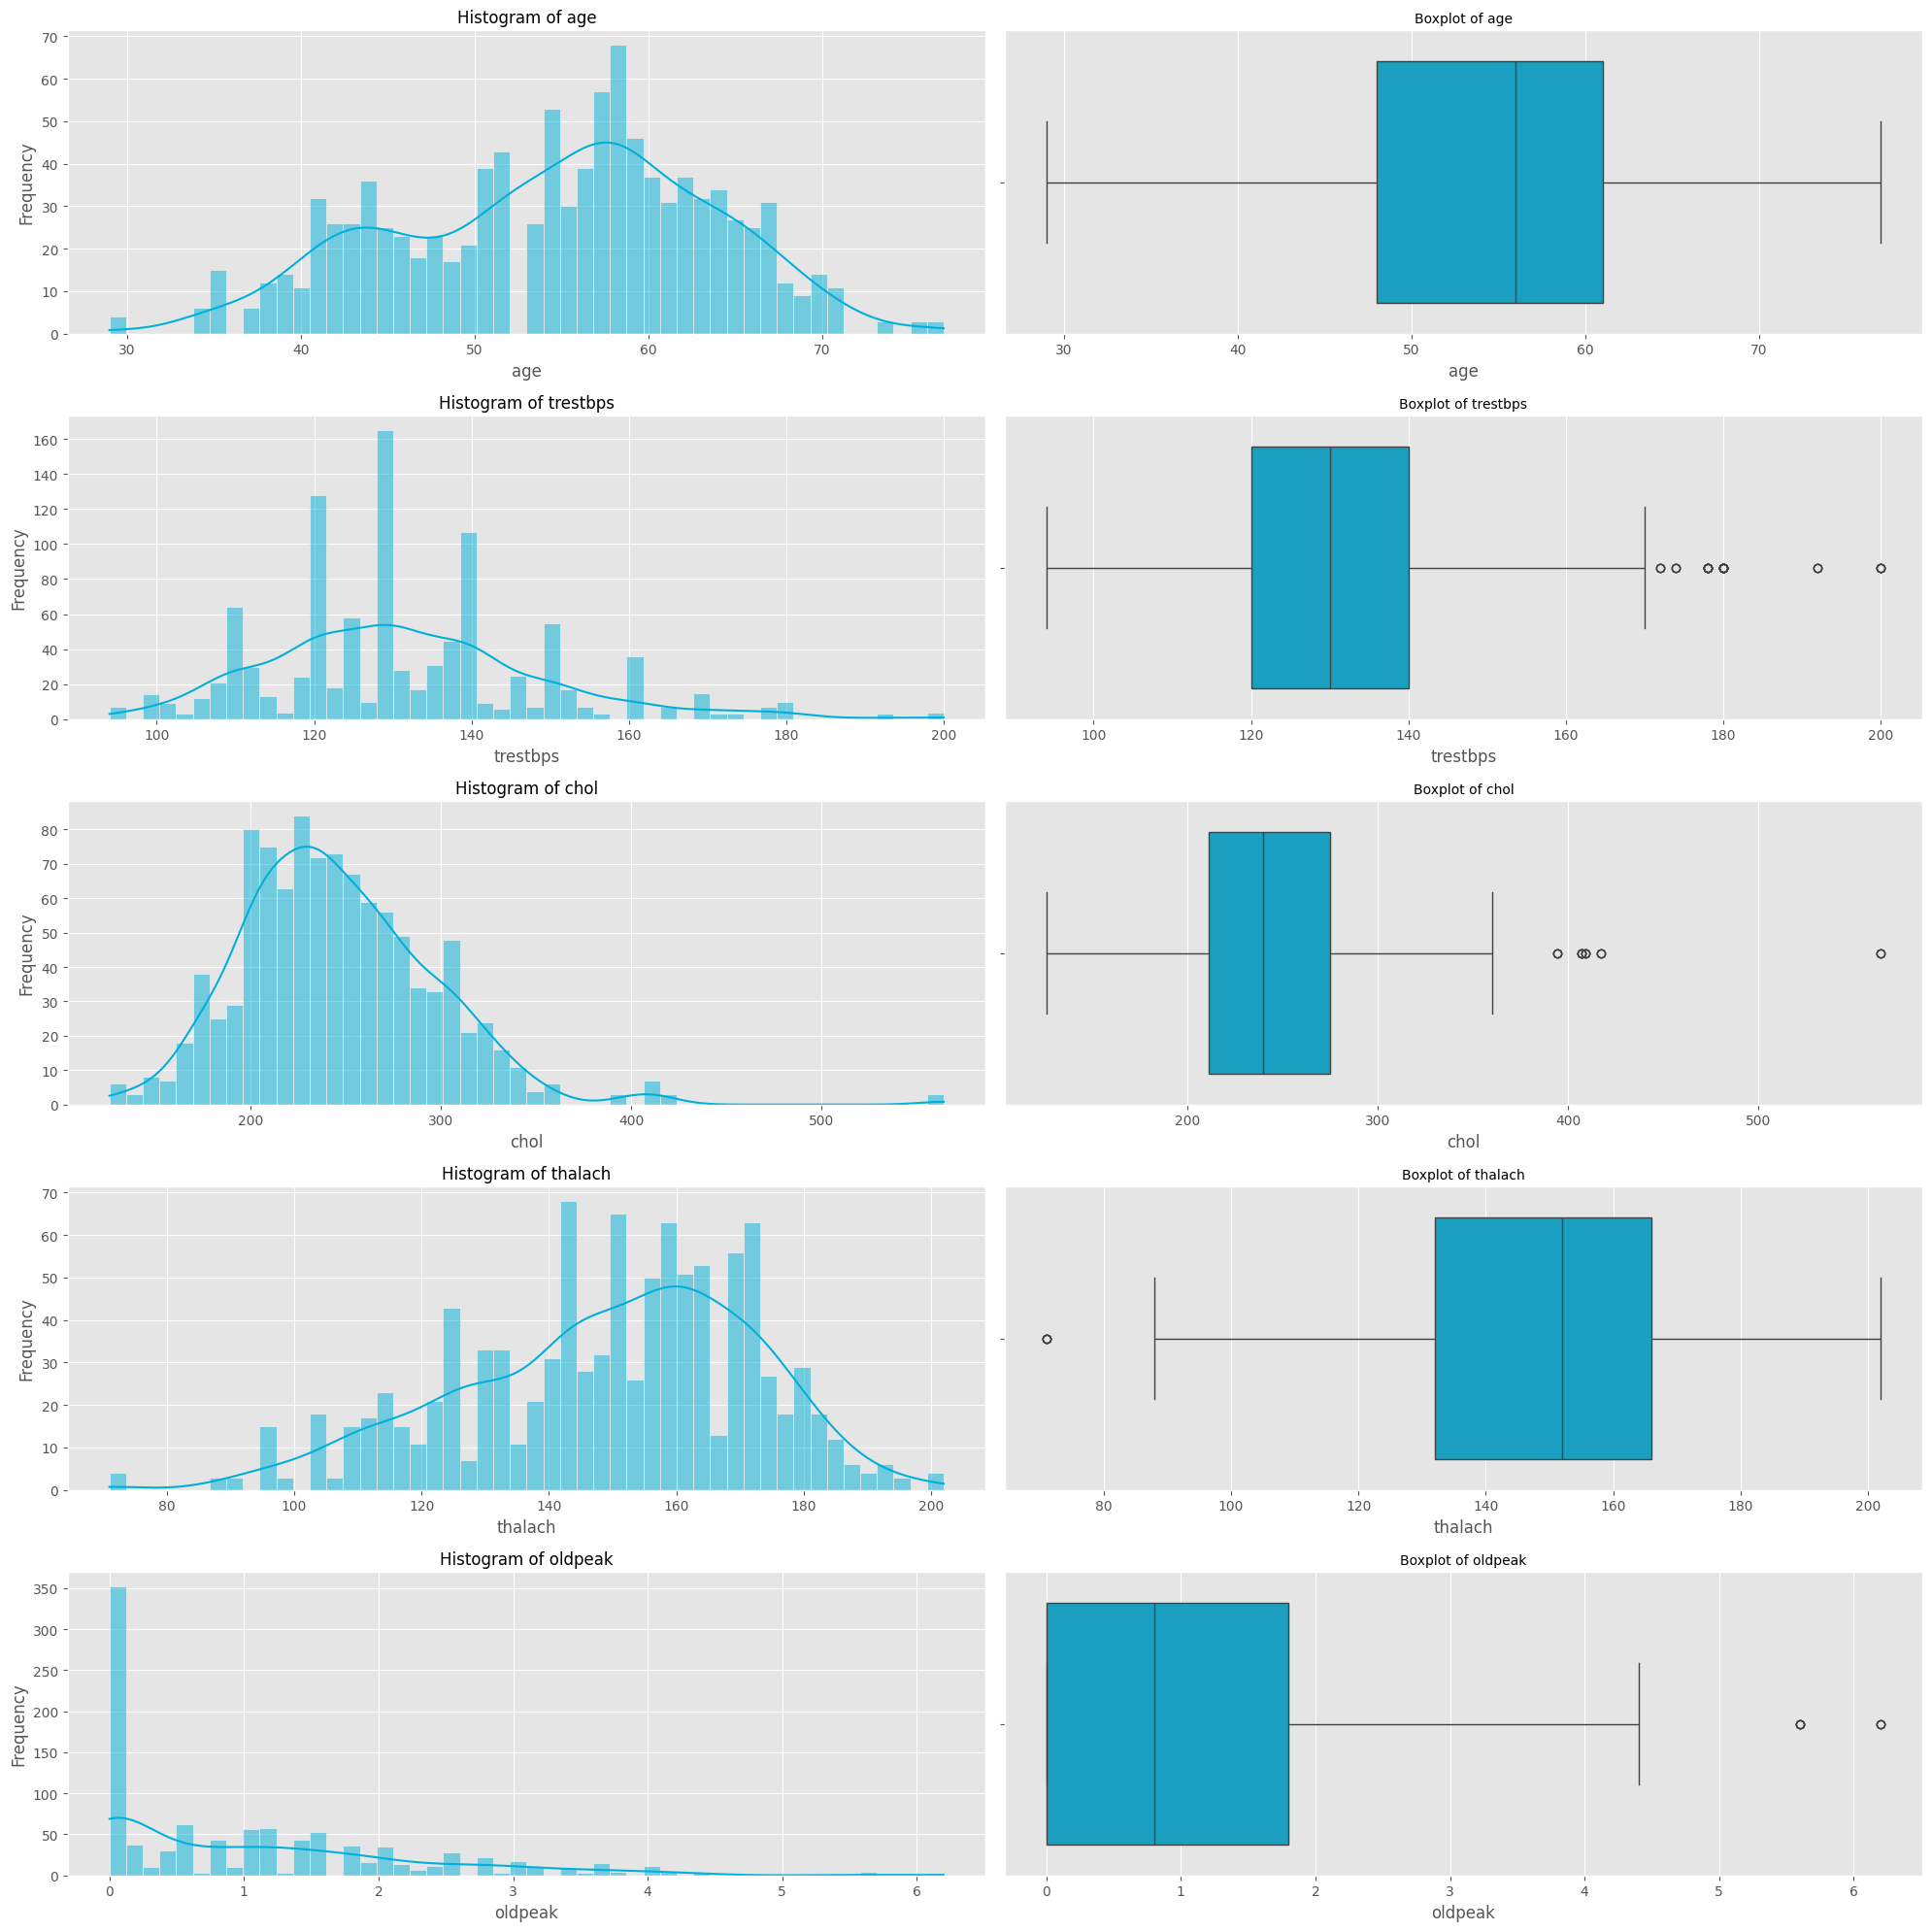

In [110]:
plt.figure(figsize=(20, 20))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#00b0db', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#00b0db')
    plt.title(f'Boxplot of {col}', size=10)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [111]:
# Normal test, skewness and data distribution

from scipy.stats import normaltest

alpha = 0.05
index = 1

dist_info = []
for feature_name in numerical:
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = data[feature_name].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([feature_name, stat, p_value, distribution, skewness, skewness_type])

distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

Feature  D'Agostino-Pearson Statistic       P-value  \
0       age                     32.332197  9.531311e-08   
1  trestbps                     97.463126  6.857268e-22   
2      chol                    236.904517  3.604439e-52   
3   thalach                     41.002935  1.248319e-09   
4   oldpeak                    193.533646  9.434150e-43   

               Distribution  Skewness Skewness Type  
0  Not Normally Distributed -0.248866     Left Skew  
1  Not Normally Distributed  0.739768    Right Skew  
2  Not Normally Distributed  1.074073    Right Skew  
3  Not Normally Distributed -0.513777     Left Skew  
4  Not Normally Distributed  1.210899    Right Skew

**Insights from normality test**

1. Not Normally Distributed:

* All features exhibit a statistically significant departure from normality, as indicated by the p-values being less than 0.05.

2. Right Skewness:

* Some features ('cp', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'oldpeak', 'ca', 'thal') demonstrate right skewness, as evidenced by positive skewness values.
* Right skewness indicates that the distribution is stretched out towards the higher values, with a longer right tail.

3. Left Skewness:
* Some features ('age', 'sex', 'thalach', 'slope', 'thal' ) demonstrate left skewness, as evidenced by negative skewness values.
* Left skewness indicates that the distribution is stretched out towards the lower values, with a longer left tail.

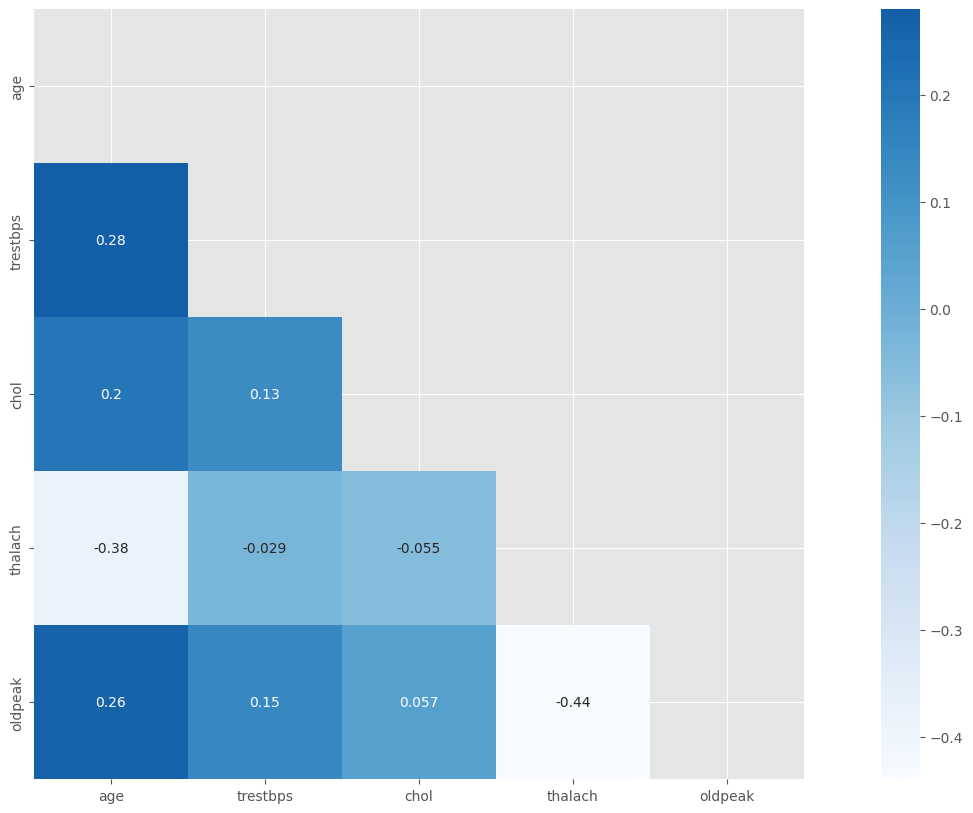

In [112]:
# Correlation between features
plt.figure(figsize=(20, 10))

matrix = np.triu(data[numerical].corr(method='spearman'))

sns.heatmap(data=data[numerical].corr(method='spearman'), annot=True, cmap='Blues', center=0, mask = matrix, square='True')
plt.show()

### **categorical**

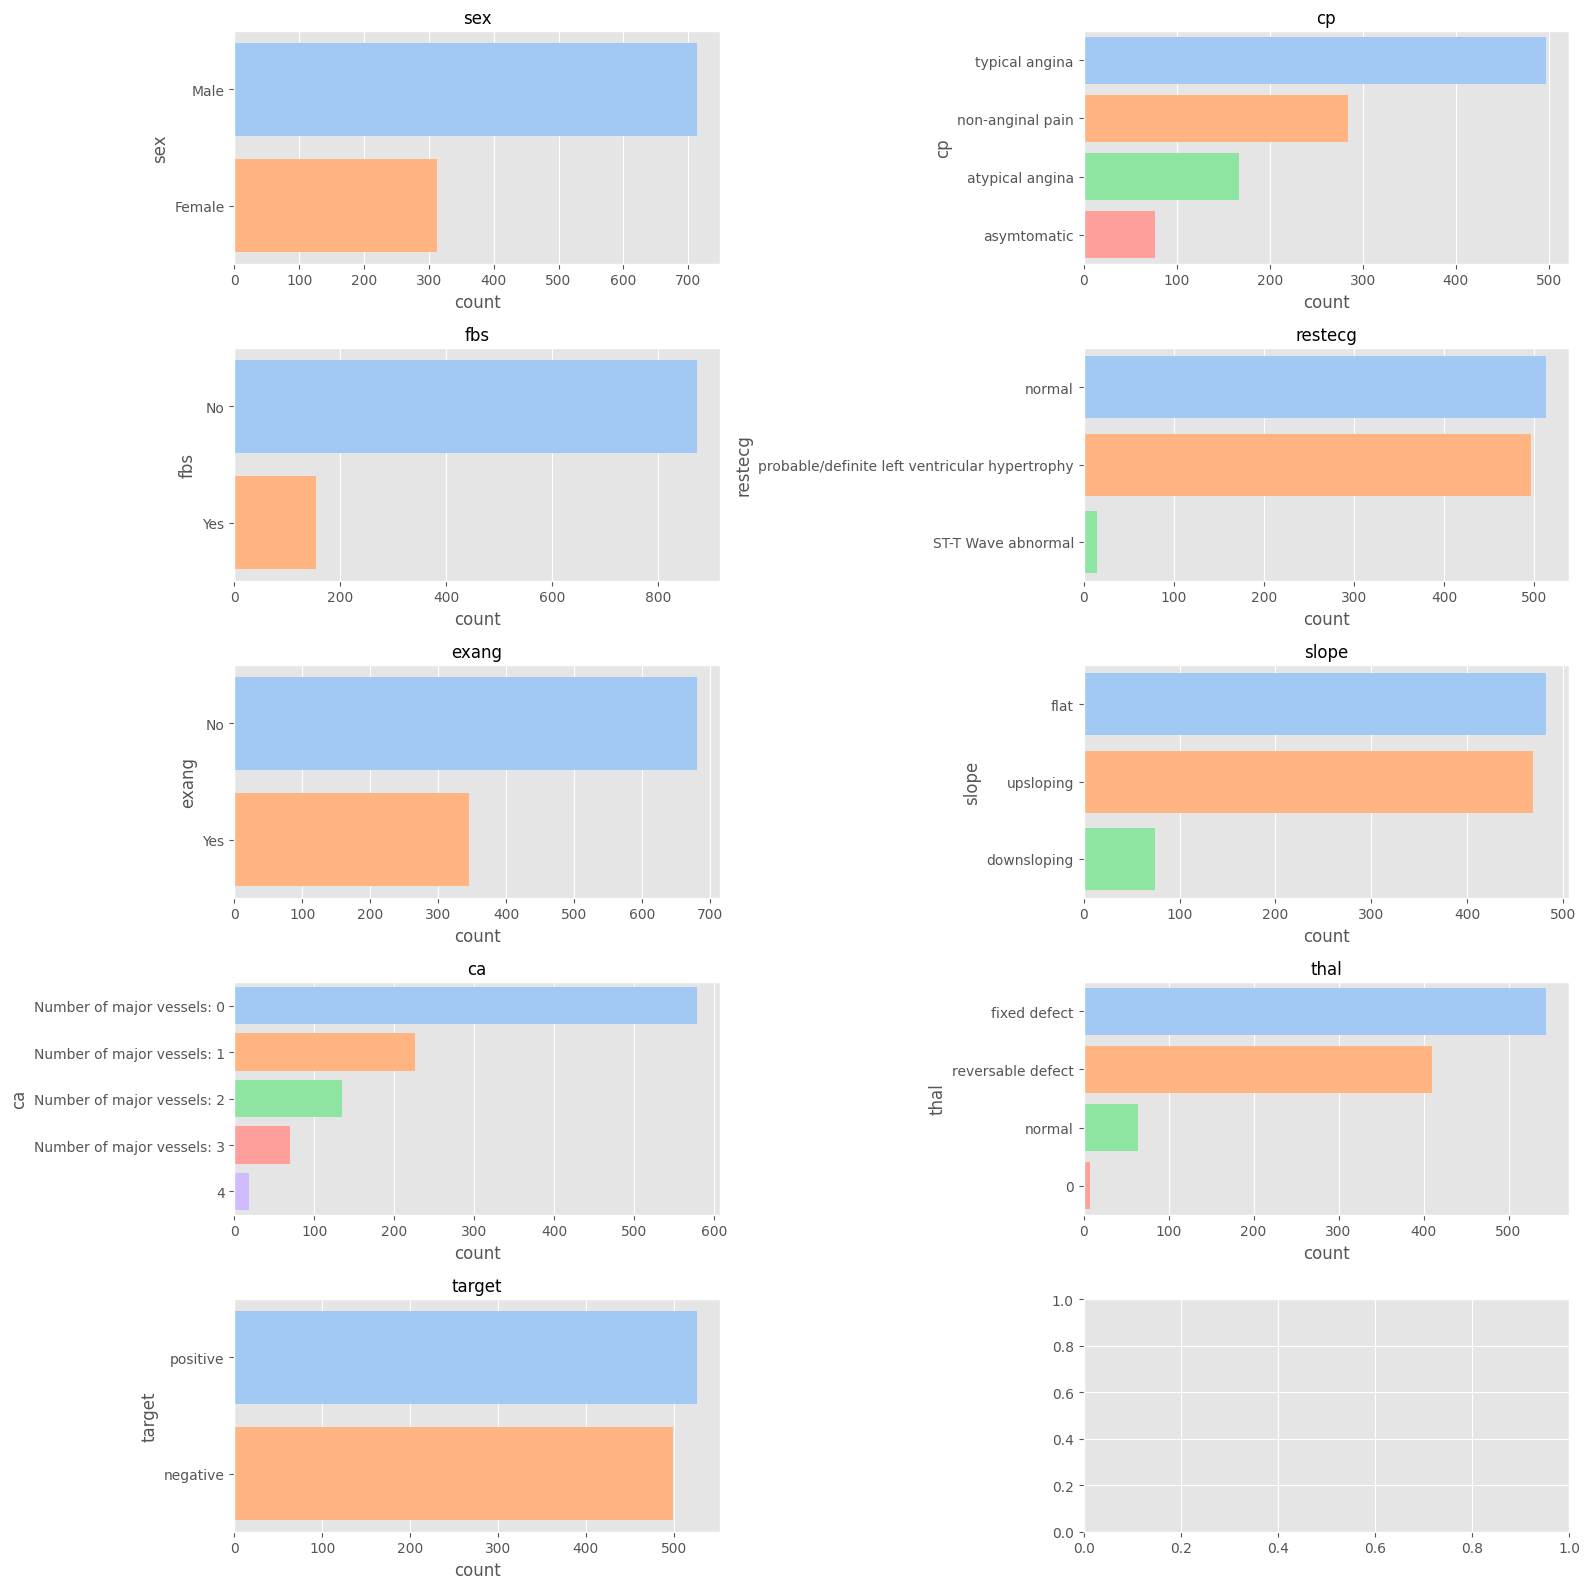

In [113]:
# Categorical features

# Set the color palette
sns.set_palette("pastel")

fig, axes = plt.subplots(5, 2, figsize=(16, 16)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y=i, ax=j, order=data[i].value_counts().index)

    # Set different colors for each bar based on the unique categories
    unique_categories = data[i].unique()
    num_categories = len(unique_categories)
    colors = sns.color_palette("pastel", n_colors=num_categories)
    color_mapping = dict(zip(unique_categories, colors))
    
    for category, patch in zip(unique_categories, ax.patches):
        patch.set_facecolor(color_mapping[category])
    
    ax.set_title(f'{i}', size=12)

plt.tight_layout()
plt.show()


## **Data Cleaning**

### **Handling anomaly**

There are some errors in the feature columns:
1. Feature 'ca' should have value between 0-3, but there are some data with value of 4. These error data will be converted to NaN.
2. Feature 'thal' should have value between 1-3, but there are some data with value of 0. These error data will be converted to NaN.

In [114]:
# Displaying total unique value from 'ca' column
data['ca'].value_counts().to_frame()

count
ca                               
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
4                              18

In [115]:
# Displaying the 'ca' column with value of 4
data.loc[data['ca']==4]

age   sex                cp  trestbps  chol  fbs  \
52    38  Male  non-anginal pain       138   175   No   
83    38  Male  non-anginal pain       138   175   No   
128   52  Male  non-anginal pain       138   223   No   
208   38  Male  non-anginal pain       138   175   No   
242   38  Male  non-anginal pain       138   175   No   
290   52  Male  non-anginal pain       138   223   No   
340   38  Male  non-anginal pain       138   175   No   
348   43  Male    typical angina       132   247  Yes   
417   52  Male  non-anginal pain       138   223   No   
428   43  Male    typical angina       132   247  Yes   
465   38  Male  non-anginal pain       138   175   No   
521   58  Male   atypical angina       125   220   No   
597   38  Male  non-anginal pain       138   175   No   
743   58  Male   atypical angina       125   220   No   
749   58  Male   atypical angina       125   220   No   
831   58  Male   atypical angina       125   220   No   
970   38  Male  non-anginal pain       138   175   No   
993   43  Male    typical angina       132   247  Yes   

                                            restecg  thalach exang  oldpeak  \
52                                           normal      173    No      0.0   
83                                           normal      173    No      0.0   
128                                          normal      169    No      0.0   
208                                          normal      173    No      0.0   
242                                          normal      173    No      0.0   
290                                          normal      169    No      0.0   
340                                          normal      173    No      0.0   
348  probable/definite left ventricular hypertrophy      143   Yes      0.1   
417                                          normal      169    No      0.0   
428  probable/definite left ventricular hypertrophy      143   Yes      0.1   
465                                          normal      173    No      0.0   
521                                          normal      144    No      0.4   
597                                          normal      173    No      0.0   
743                                          normal      144    No      0.4   
749                                          normal      144    No      0.4   
831                                          normal      144    No      0.4   
970                                          normal      173    No      0.0   
993  probable/definite left ventricular hypertrophy      143   Yes      0.1   

         slope ca               thal    target  
52   upsloping  4       fixed defect  positive  
83   upsloping  4       fixed defect  positive  
128  upsloping  4       fixed defect  positive  
208  upsloping  4       fixed defect  positive  
242  upsloping  4       fixed defect  positive  
290  upsloping  4       fixed defect  positive  
340  upsloping  4       fixed defect  positive  
348       flat  4  reversable defect  negative  
417  upsloping  4       fixed defect  positive  
428       flat  4  reversable defect  negative  
465  upsloping  4       fixed defect  positive  
521       flat  4  reversable defect  positive  
597  upsloping  4       fixed defect  positive  
743       flat  4  reversable defect  positive  
749       flat  4  reversable defect  positive  
831       flat  4  reversable defect  positive  
970  upsloping  4       fixed defect  positive  
993       flat  4  reversable defect  negative

There are 18 numbers of 'ca' with value of 4

In [116]:
# Converting 'ca' column with value of '4' into NaN
# Because there is no value of 4
data.loc[data['ca']==4, 'ca'] = np.NaN

In [117]:
# Displaying total unique value from 'thal' column
data['thal'].value_counts().to_frame()

count
thal                    
fixed defect         544
reversable defect    410
normal                64
0                      7

In [118]:
# Displaying the 'thal' column with value of '0'
data.loc[data['thal']== 0]

age     sex                cp  trestbps  chol  fbs  \
14    52    Male    typical angina       128   204  Yes   
319   53  Female  non-anginal pain       128   216   No   
329   53  Female  non-anginal pain       128   216   No   
359   53  Female  non-anginal pain       128   216   No   
686   52    Male    typical angina       128   204  Yes   
734   52    Male    typical angina       128   204  Yes   
893   52    Male    typical angina       128   204  Yes   

                                            restecg  thalach exang  oldpeak  \
14                                           normal      156   Yes      1.0   
319  probable/definite left ventricular hypertrophy      115    No      0.0   
329  probable/definite left ventricular hypertrophy      115    No      0.0   
359  probable/definite left ventricular hypertrophy      115    No      0.0   
686                                          normal      156   Yes      1.0   
734                                          normal      156   Yes      1.0   
893                                          normal      156   Yes      1.0   

         slope                          ca thal    target  
14        flat  Number of major vessels: 0    0  negative  
319  upsloping  Number of major vessels: 0    0  positive  
329  upsloping  Number of major vessels: 0    0  positive  
359  upsloping  Number of major vessels: 0    0  positive  
686       flat  Number of major vessels: 0    0  negative  
734       flat  Number of major vessels: 0    0  negative  
893       flat  Number of major vessels: 0    0  negative

There are 7 numbers of 'thal' with value of 0

In [119]:
# Converting 'thal' column with value of '0' into NaN
# Because there must be no value of 0 from 'thal'
data.loc[data['thal']==0, 'thal'] = np.NaN

In [120]:
data['thal'].value_counts().to_frame()

count
thal                    
fixed defect         544
reversable defect    410
normal                64

### **Handling missing values**

In [121]:
# Calculating the overall missing values in the dataframe
data.isnull().sum().sum()

25

In [122]:
# Calculating missing value from every columns
pd.DataFrame({'Missing values': [data[col].isna().sum() for col in data.columns]}, index=data.columns.values)

Missing values
age                    0
sex                    0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                    18
thal                   7
target                 0

In [123]:
# Calculating the percentage of missing values from every columns
df_miss_percent = data.isna().sum()* 100/len(data)  
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'})

Percentage of Missing values
age                           0.000000
sex                           0.000000
cp                            0.000000
trestbps                      0.000000
chol                          0.000000
fbs                           0.000000
restecg                       0.000000
thalach                       0.000000
exang                         0.000000
oldpeak                       0.000000
slope                         0.000000
ca                            1.756098
thal                          0.682927
target                        0.000000

In [124]:
# Calculating the percentage of overall missing values
data.isnull().sum()/len(data) * 100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.756098
thal        0.682927
target      0.000000
dtype: float64

The missing values are located in the features of 'ca' and 'thal'. Because their percentage are small, we decide to drop these rows.

In [125]:
# deleting rows with missing values
data = data.dropna()

In [126]:
# Calculating the percentage of missing values after deleting rows
df_miss_percent = data.isna().sum()* 100/len(data)  
df_miss_percent.to_frame().rename(columns={0:'Percentage of Missing values'})

Percentage of Missing values
age                                0.0
sex                                0.0
cp                                 0.0
trestbps                           0.0
chol                               0.0
fbs                                0.0
restecg                            0.0
thalach                            0.0
exang                              0.0
oldpeak                            0.0
slope                              0.0
ca                                 0.0
thal                               0.0
target                             0.0

### **Handling duplicated data**

In [127]:
# Checking duplicated data
data.duplicated().sum()

704

In [128]:
# displaying rows with duplicated data
data[data.duplicated()]

age     sex                cp  trestbps  chol fbs  \
15     34  Female   atypical angina       118   210  No   
31     50  Female   atypical angina       120   244  No   
43     46    Male    typical angina       120   249  No   
55     55    Male    typical angina       140   217  No   
61     66  Female  non-anginal pain       146   278  No   
...   ...     ...               ...       ...   ...  ..   
1020   59    Male   atypical angina       140   221  No   
1021   60    Male    typical angina       125   258  No   
1022   47    Male    typical angina       110   275  No   
1023   50  Female    typical angina       110   254  No   
1024   54    Male    typical angina       120   188  No   

                                             restecg  thalach exang  oldpeak  \
15                                            normal      192    No      0.7   
31                                            normal      162    No      1.1   
43    probable/definite left ventricular hypertrophy      144    No      0.8   
55                                            normal      111   Yes      5.6   
61    probable/definite left ventricular hypertrophy      152    No      0.0   
...                                              ...      ...   ...      ...   
1020                                          normal      164   Yes      0.0   
1021  probable/definite left ventricular hypertrophy      141   Yes      2.8   
1022  probable/definite left ventricular hypertrophy      118   Yes      1.0   
1023  probable/definite left ventricular hypertrophy      159    No      0.0   
1024                                          normal      113    No      1.4   

            slope                          ca               thal    target  
15      upsloping  Number of major vessels: 0       fixed defect  positive  
31      upsloping  Number of major vessels: 0       fixed defect  positive  
43      upsloping  Number of major vessels: 0  reversable defect  negative  
55    downsloping  Number of major vessels: 0  reversable defect  negative  
61           flat  Number of major vessels: 1       fixed defect  positive  
...           ...                         ...                ...       ...  
1020    upsloping  Number of major vessels: 0       fixed defect  positive  
1021         flat  Number of major vessels: 1  reversable defect  negative  
1022         flat  Number of major vessels: 1       fixed defect  negative  
1023    upsloping  Number of major vessels: 0       fixed defect  positive  
1024         flat  Number of major vessels: 1  reversable defect  negative  

[704 rows x 14 columns]

In [129]:
# Dropping duplicated data
data.drop_duplicates(keep="first", inplace=True)

# Checking the number of duplicated data after treatment
data.duplicated().sum()

0

All anomalies, missing values, and duplicates have been handled.

### **Reviewing outliers**

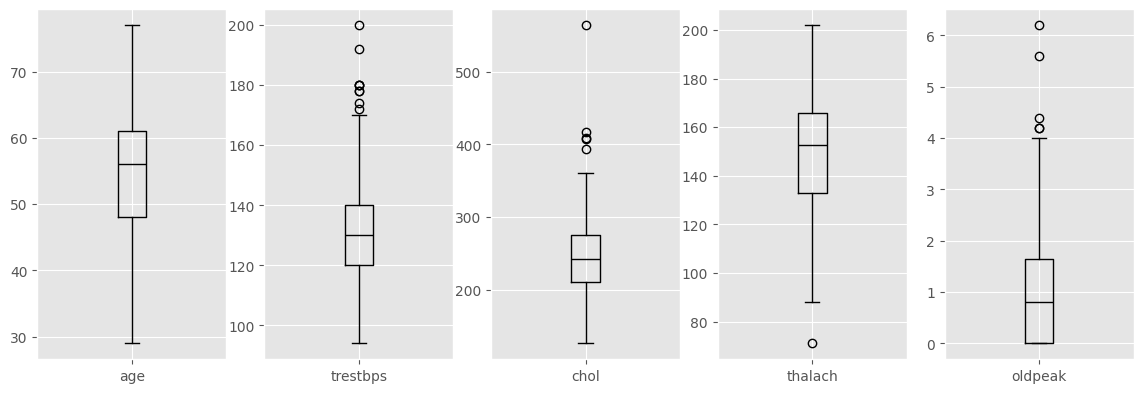

In [130]:
# displaying outliers
data.plot(kind = 'box',
          subplots = True,
          layout = (2,7),
          sharex = False,
          sharey = False,
          figsize = (20, 10),
          color = 'k')
plt.show()

In [131]:
def outlier_percentage(data,column):
    Q1 = data[column].quantile(1/4)
    Q3 = data[column].quantile(3/4)
    iqr = Q3-Q1
    outlier_lower_limit = Q1 - 1.5 * iqr
    outlier_upper_limit = Q3 + 1.5 * iqr
    num_of_outliers = len(data[(data[column]<outlier_lower_limit) | (data[column]>outlier_upper_limit)])
    outlier_percentage = round(num_of_outliers/len(data[column])*100,2)
    return num_of_outliers, outlier_percentage, outlier_lower_limit, outlier_upper_limit
    
outliers = []
   
for i in numerical:
    total_outliers, outliers_percent, lower_bound, upper_bound = outlier_percentage(data,i)
    outliers.append([i, total_outliers, outliers_percent, lower_bound, upper_bound])
    
outliers_info = pd.DataFrame(outliers, columns = ["Columns", "Number of Outliers","(%) of Outliers","Lower bound","Upper bound"])
outliers_info

Columns  Number of Outliers  (%) of Outliers  Lower bound  Upper bound
0       age                   0             0.00       28.500       80.500
1  trestbps                   9             3.04       90.000      170.000
2      chol                   5             1.69      114.625      371.625
3   thalach                   1             0.34       83.500      215.500
4   oldpeak                   5             1.69       -2.475        4.125

We recognize there are outliers in our features. We decide to handle outliers by using winsoration method in the next chapter.

### **Multicolinearity check**

In [132]:
# Defining variance inflation factors
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

In [133]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [134]:
vif_df

Feature       VIF
0  thalach  1.645051
1  oldpeak  1.645051

In [135]:
dropped_columns

['trestbps', 'age', 'chol']

There is an indication of multicolinearity as some features have VIF more than 10.

### **Reviewing Cardinality**

In [136]:
# Checking cardinality

# creating a function to check cardinality
def check_cardinality(data):
    cardinality_info = []

    for feature in data.select_dtypes(include='object').columns:
        cardinality = len(data[feature].unique())
        warning = "High" if cardinality > 10 else "Low"
        cardinality_info.append({'Feature': feature, 'Cardinality': cardinality, 'Warning': warning})

    return pd.DataFrame(cardinality_info)

cardinality_data = check_cardinality(data)
cardinality_data

Feature  Cardinality Warning
0      sex            2     Low
1       cp            4     Low
2      fbs            2     Low
3  restecg            3     Low
4    exang            2     Low
5    slope            3     Low
6       ca            4     Low
7     thal            3     Low
8   target            2     Low

Our categorical features have low cardinality

### **Imbalanced class check**

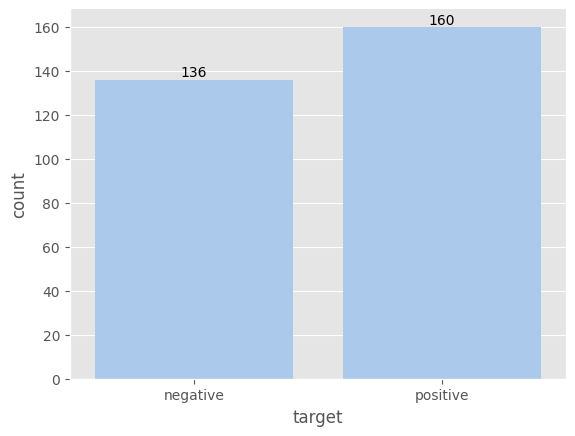

In [137]:
# Memeriksa data imbalance
ax = sns.countplot(data, x="target")
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [138]:
data['target'].value_counts(normalize=True).to_frame()

proportion
target              
positive    0.540541
negative    0.459459

The data little bit imbalanced, however still categorized as mildly imbalanced.

## **Data Analysis**

### **Features vs Target**

For the purpose of analysis we will use the data before outlier handling/cleaning (features have not been modified) and the data after treatment (features have been modified) 

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       296 non-null    int64  
 1   sex       296 non-null    object 
 2   cp        296 non-null    object 
 3   trestbps  296 non-null    int64  
 4   chol      296 non-null    int64  
 5   fbs       296 non-null    object 
 6   restecg   296 non-null    object 
 7   thalach   296 non-null    int64  
 8   exang     296 non-null    object 
 9   oldpeak   296 non-null    float64
 10  slope     296 non-null    object 
 11  ca        296 non-null    object 
 12  thal      296 non-null    object 
 13  target    296 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 34.7+ KB


In [140]:
display(data[data['target'] == 'positive'].describe(), data[data['target'] == 'positive'].describe(include='O'))

age   trestbps       chol     thalach    oldpeak
count  160.000000  160.00000  160.00000  160.000000  160.00000
mean    52.643750  129.17500  243.49375  158.581250    0.59875
std      9.551151   16.37399   53.75755   19.043304    0.78716
min     29.000000   94.00000  126.00000   96.000000    0.00000
25%     44.750000  120.00000  208.75000  149.000000    0.00000
50%     52.000000  130.00000  235.50000  161.000000    0.20000
75%     59.000000  140.00000  268.25000  172.000000    1.10000
max     76.000000  180.00000  564.00000  202.000000    4.20000

sex                cp  fbs restecg exang      slope  \
count    160               160  160     160   160        160   
unique     2                 4    2       3     2          3   
top     Male  non-anginal pain   No  normal    No  upsloping   
freq      89                65  137      92   137        103   

                                ca          thal    target  
count                          160           160       160  
unique                           4             3         1  
top     Number of major vessels: 0  fixed defect  positive  
freq                           129           127       160

In [141]:
display(data[data['target'] == 'negative'].describe(), data[data['target'] == 'negative'].describe(include='O'))

age    trestbps        chol     thalach     oldpeak
count  136.000000  136.000000  136.000000  136.000000  136.000000
mean    56.735294  134.463235  251.463235  138.948529    1.600735
std      7.923930   18.858894   49.651811   22.716064    1.302618
min     35.000000  100.000000  131.000000   71.000000    0.000000
25%     52.750000  120.000000  217.750000  125.000000    0.600000
50%     58.000000  130.000000  251.000000  141.500000    1.400000
75%     62.000000  145.000000  283.250000  156.250000    2.525000
max     77.000000  200.000000  409.000000  195.000000    6.200000

sex              cp  fbs  \
count    136             136  136   
unique     2               4    2   
top     Male  typical angina   No   
freq     112             102  116   

                                               restecg exang slope  \
count                                              136   136   136   
unique                                               3     2     3   
top     probable/definite left ventricular hypertrophy   Yes  flat   
freq                                                78    74    89   

                                ca               thal    target  
count                          136                136       136  
unique                           4                  3         1  
top     Number of major vessels: 0  reversable defect  negative  
freq                            44                 88       136

### **Numerical features vs target**

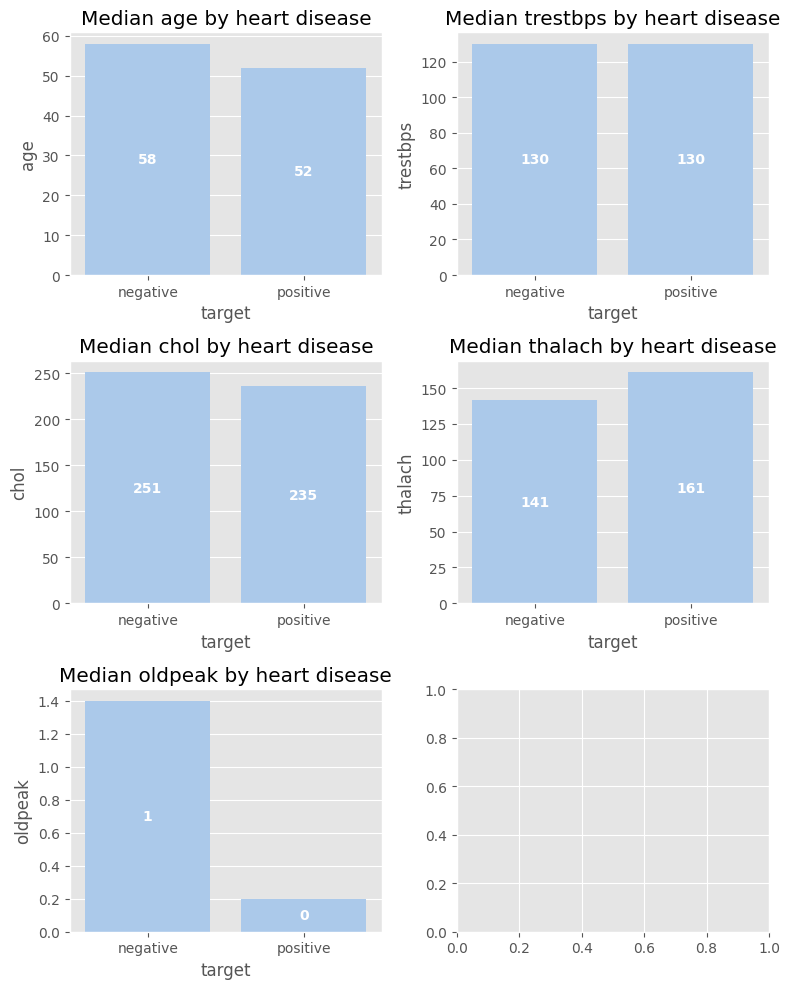

In [142]:
# Numerical features vs Target

# Setting numerical column
numerical = data.select_dtypes(include=[np.number]).columns

# Setting up size of the plot
fig, axes = plt.subplots(3, 2, figsize=(8, 10))

# Loop over each numerical column
for col, ax in zip(numerical, axes.flatten()):
    # Create the barplot
    barplot = sns.barplot(data=data, y=col, x='target', estimator=np.median, ci=None, ax=ax)
    
    # Add annotations
    for p in barplot.patches:
        value = f'{int(p.get_height())}'  # Convert height to integer and string
        ax.annotate(value,
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')
    
    ax.set_title(f'Median {col} by heart disease')

plt.tight_layout()
plt.show()


### **Categorical features vs target**

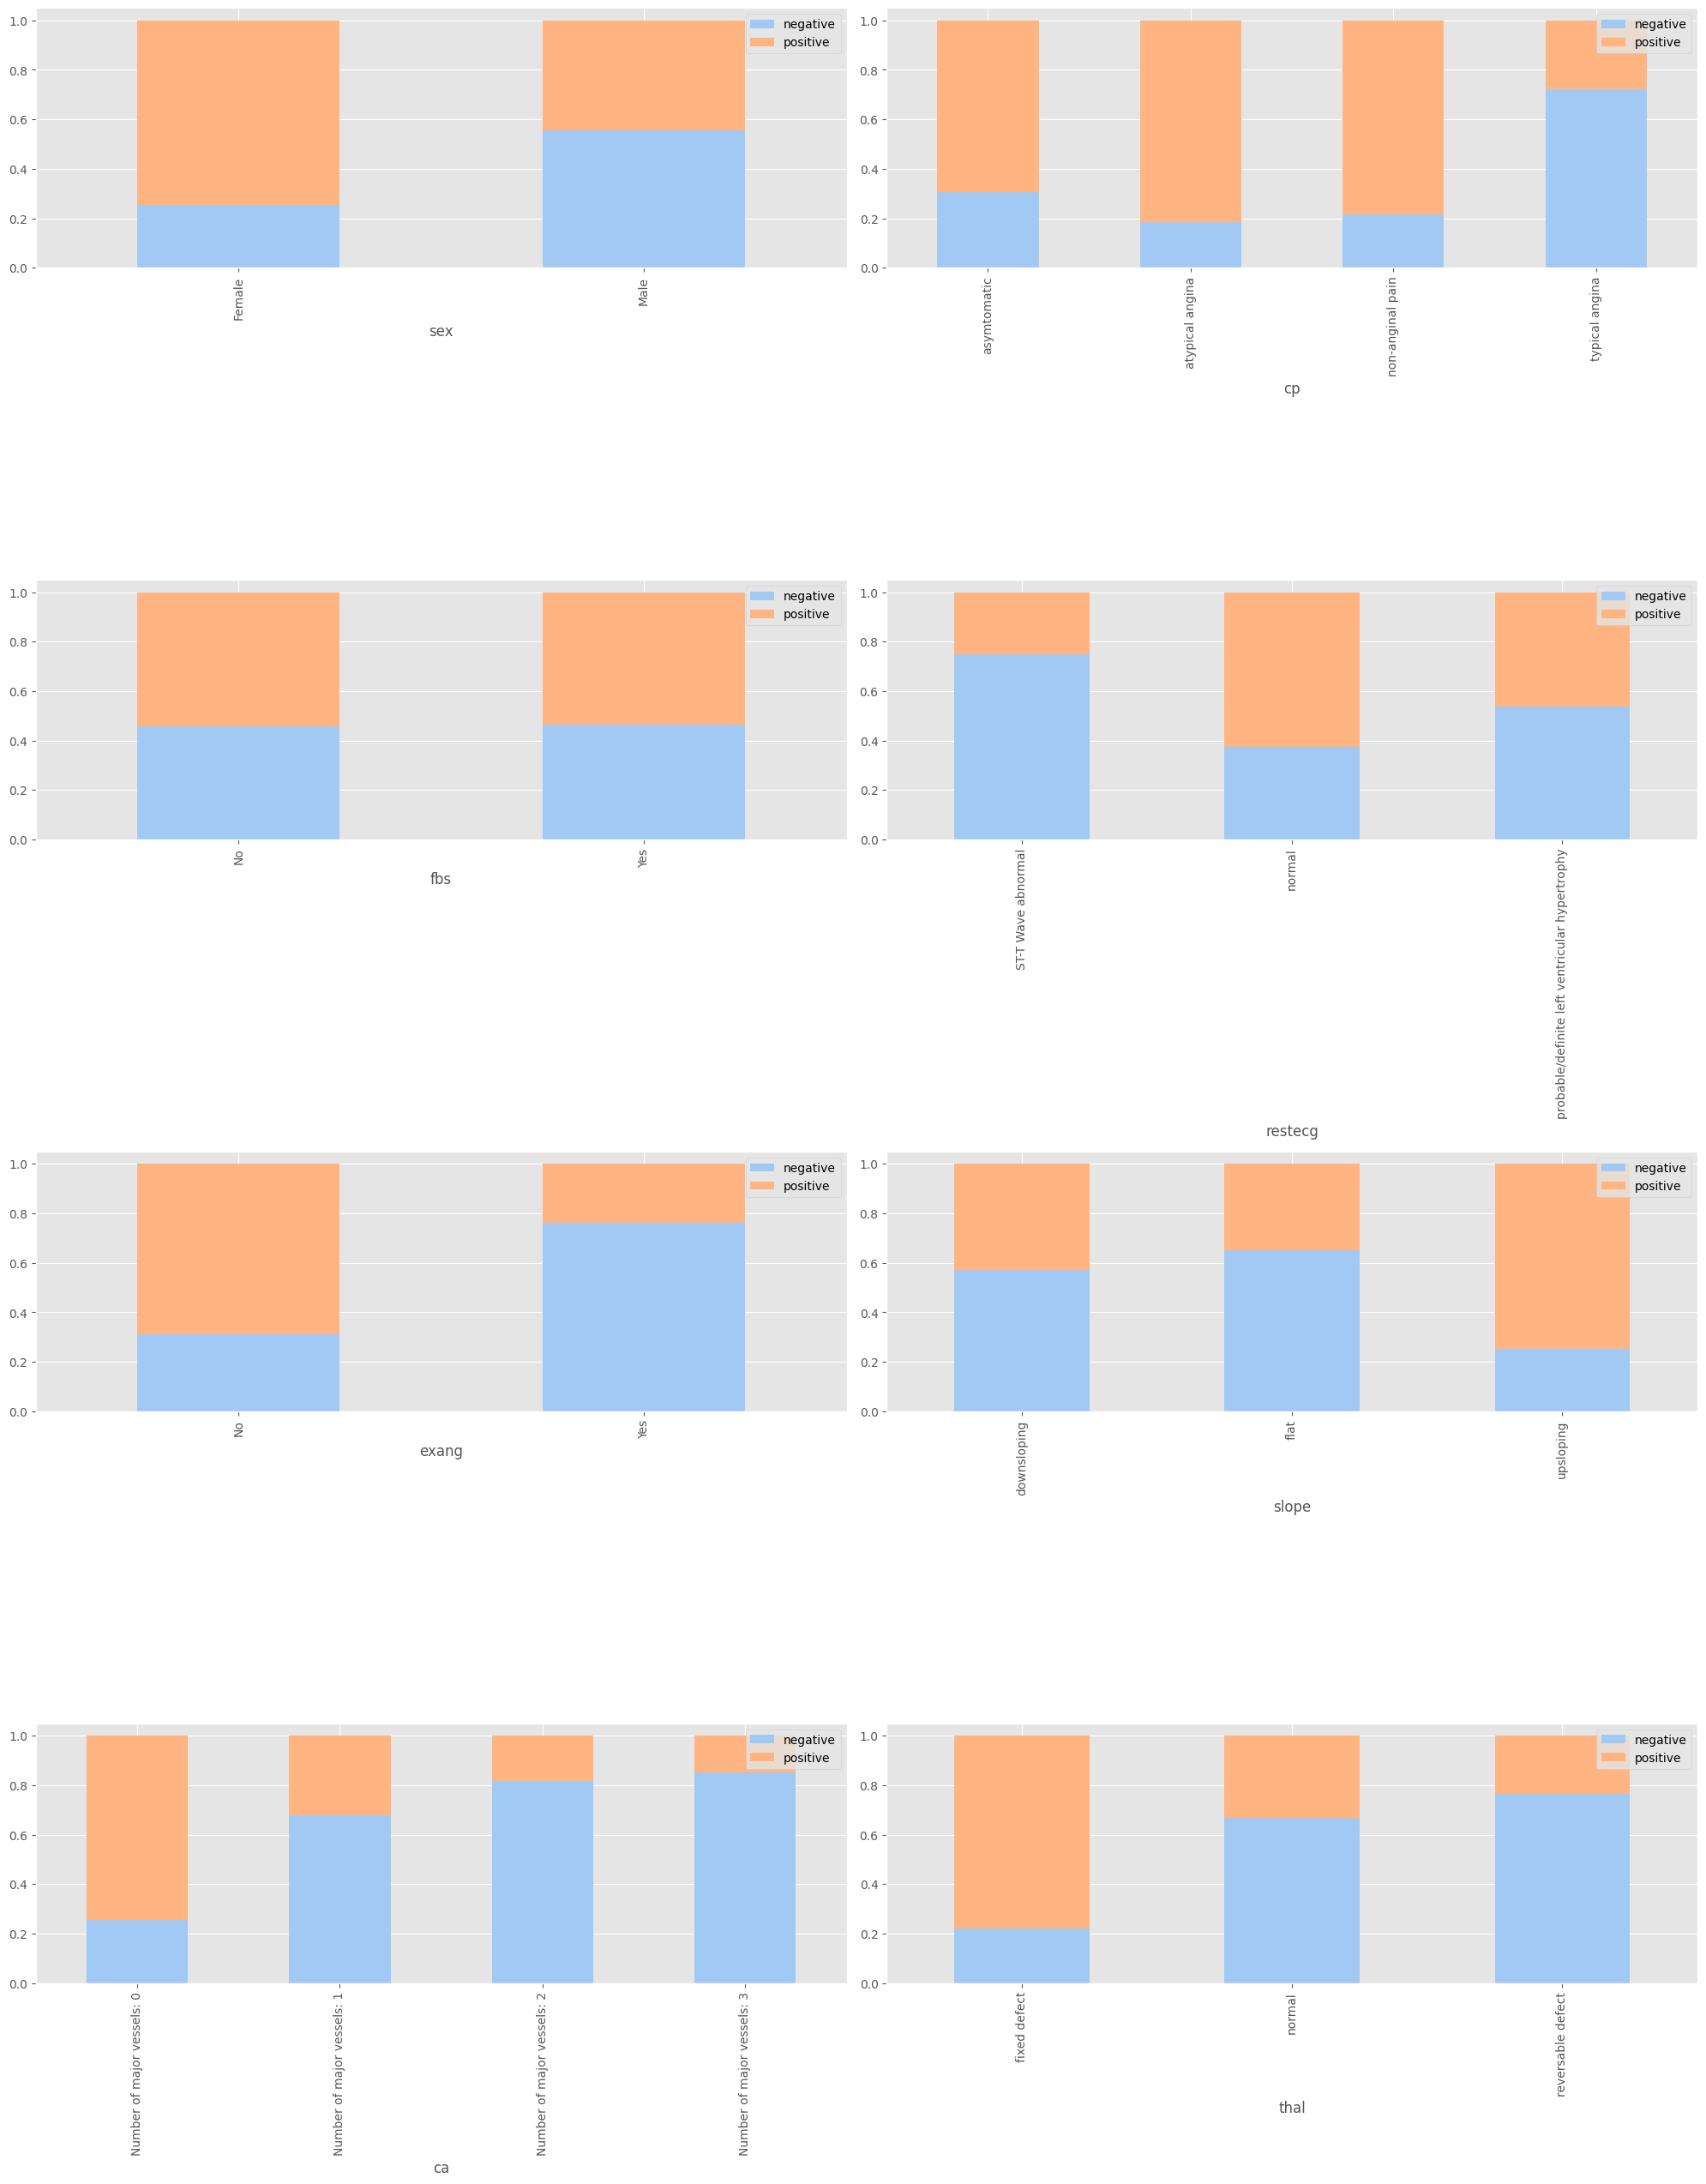

In [143]:
# Visualizing claim proportion of categorical features
count = 0
fig = plt.figure(figsize=(20,30))

for i in data.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']).columns:
    count += 1
    ax = plt.subplot(5, 2, count)
    pd.crosstab(data[i], data['target'], normalize=0).plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc='upper right')  # Position the legend in the upper right corner
    fig.tight_layout()

plt.show()

In [144]:
# Creating function for plotting categorical features
def create_plot(data, col, x_maks=1000):

    agg_table = data.groupby([col, 'target']).size().unstack().reset_index()
    agg_table['total'] = agg_table['positive']+agg_table['negative']
    agg_table['% positive'] = (agg_table['positive']/agg_table['total']*100).round(2)
    agg_table = agg_table.sort_values(by='% positive', ascending=False)
    agg_table

    fig, axes = plt.subplots(1, 2, figsize=(16,5))

    ax1 = sns.barplot(data=agg_table, y=col, x='% positive', ax=axes[0])
    label = ['{:.1f} %'.format(x) for x in ax1.containers[0].datavalues]
    ax1.bar_label(ax1.containers[0], labels=label, padding=3, label_type='center')
    ax1.set_title(f'Percentage of getting sick by heart disease by {col}')

    ax2 = sns.countplot(data=data, y=col, hue='target', order=agg_table[col], ax=axes[1])
    ax2.set_title(f'Number of patient getting sick by heart disease according to {col}')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)

    plt.tight_layout()
    plt.show()

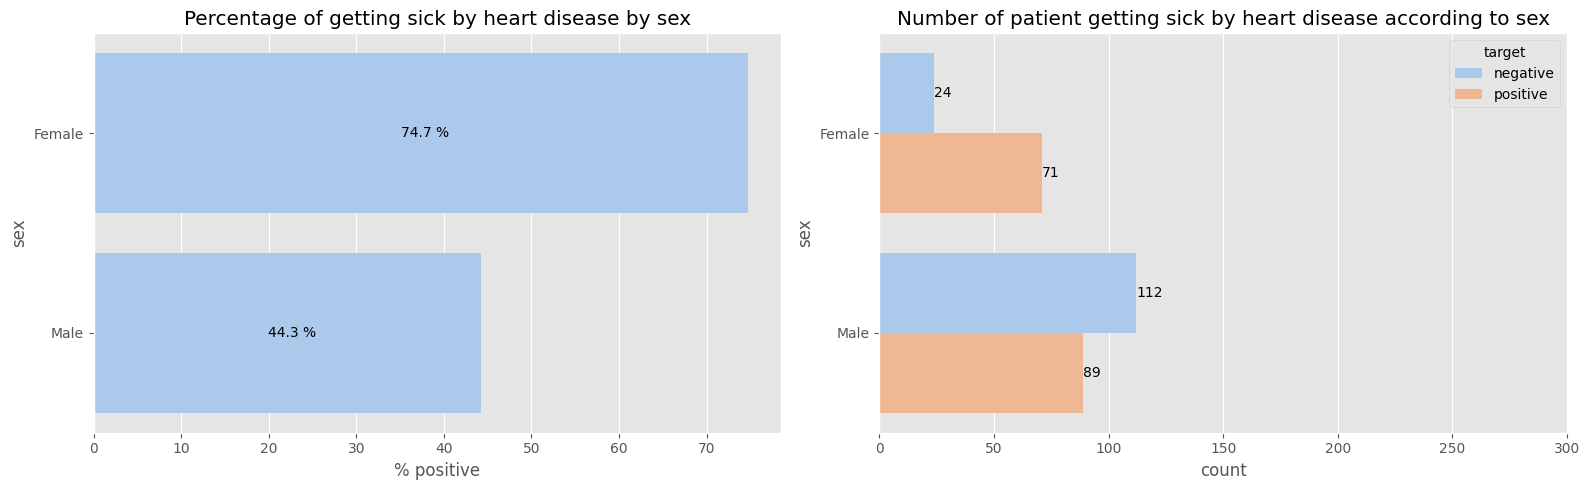

In [145]:
# Percentage and number of claim by 'sex'
create_plot(data, 'sex', x_maks=300)

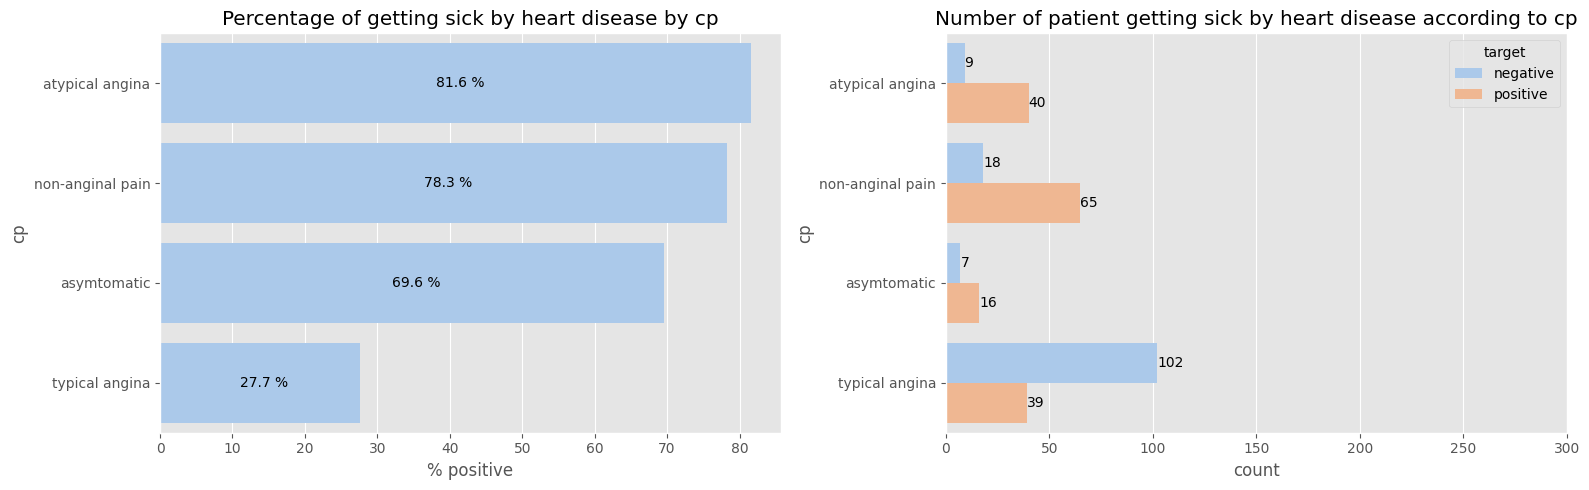

In [146]:
# Percentage and number of claim by 'cp'
create_plot(data, 'cp', x_maks=300)

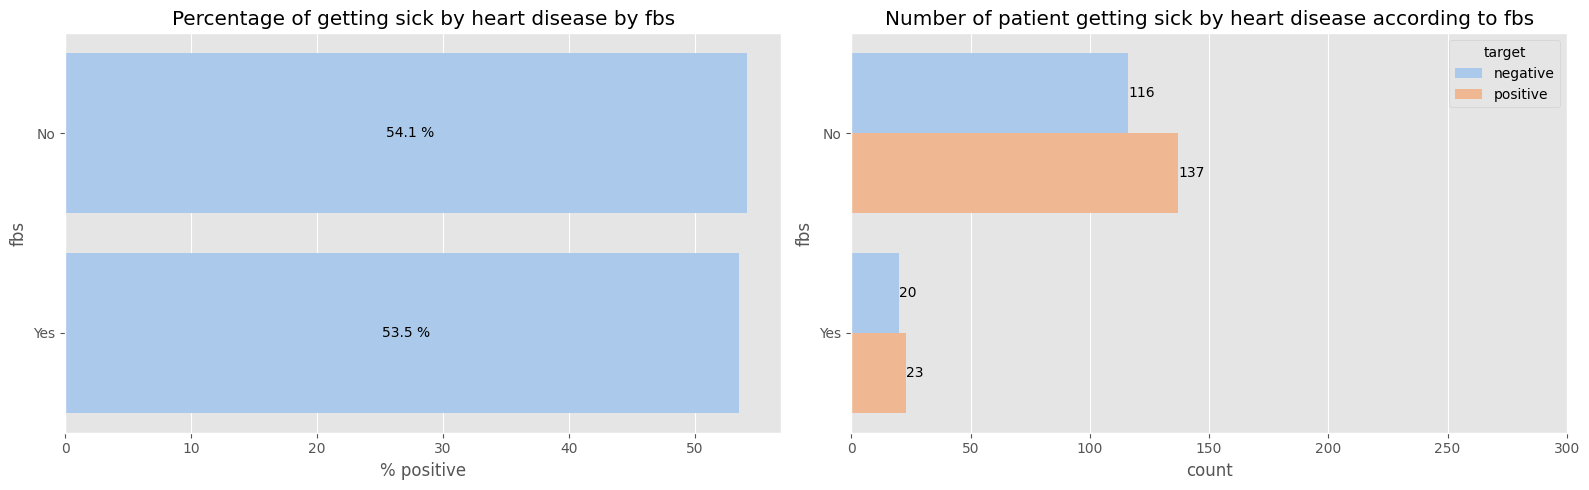

In [147]:
# Percentage and number of claim by 'fbs'
create_plot(data, 'fbs', x_maks=300)

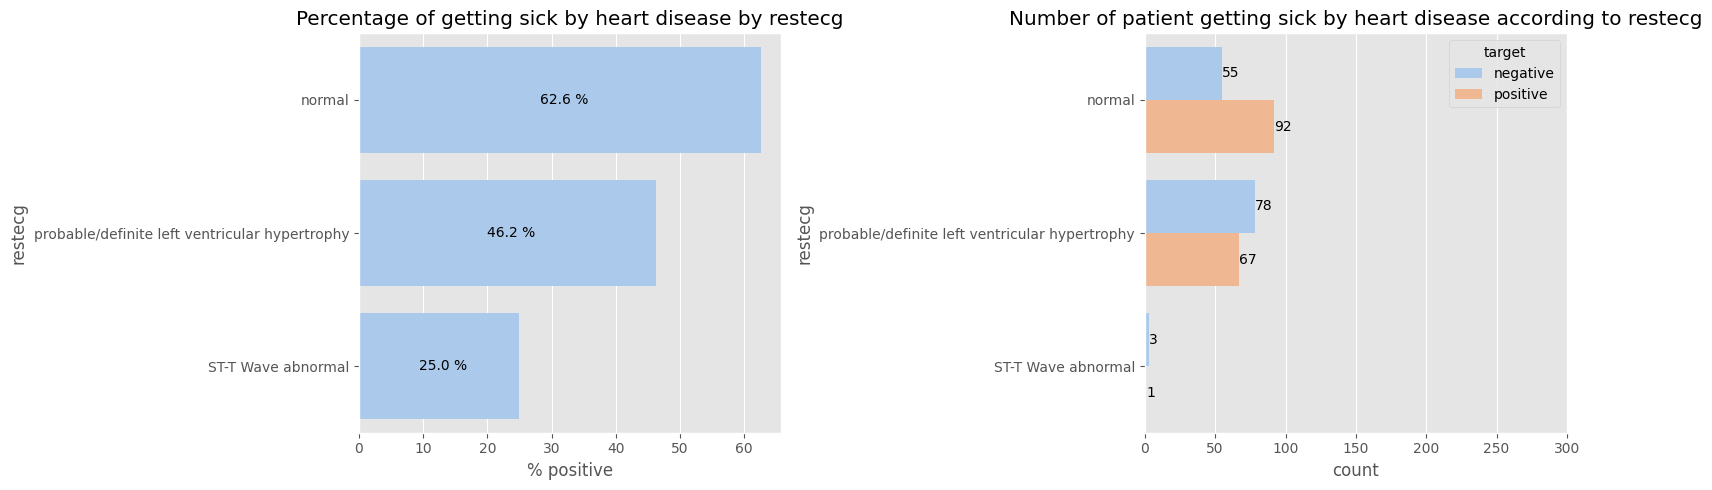

In [148]:
# Percentage and number of heart disease's patient by 'restecg'
create_plot(data, 'restecg', x_maks=300)

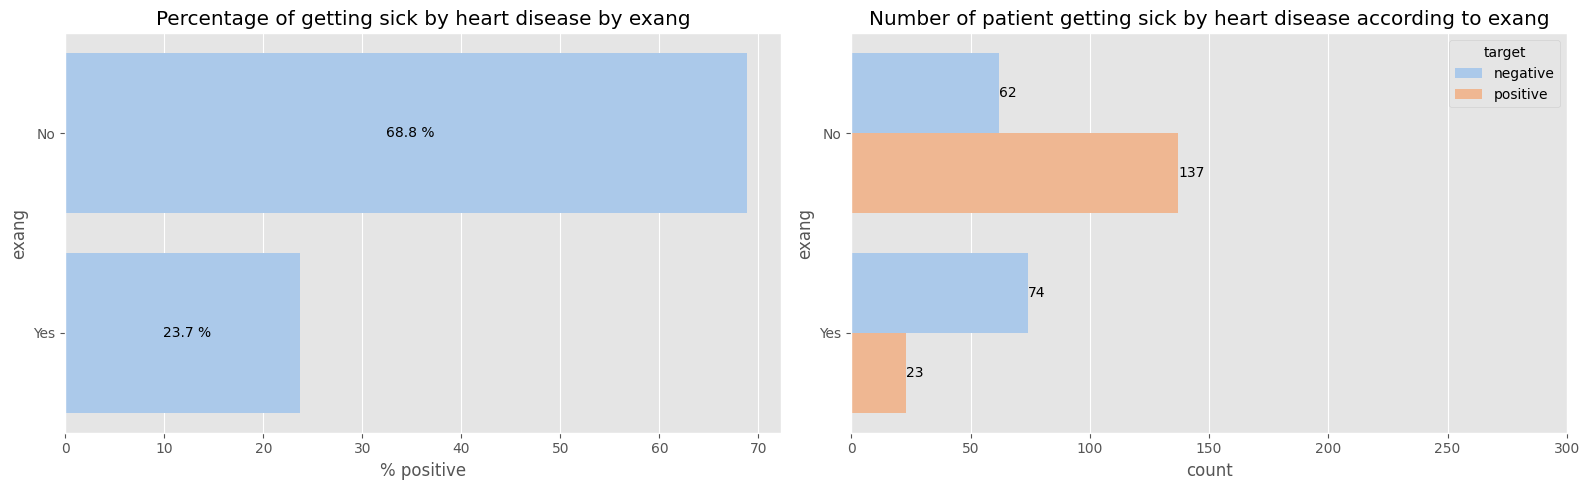

In [149]:
# Percentage and number of heart disease's patient by 'exang'
create_plot(data, 'exang', x_maks=300)

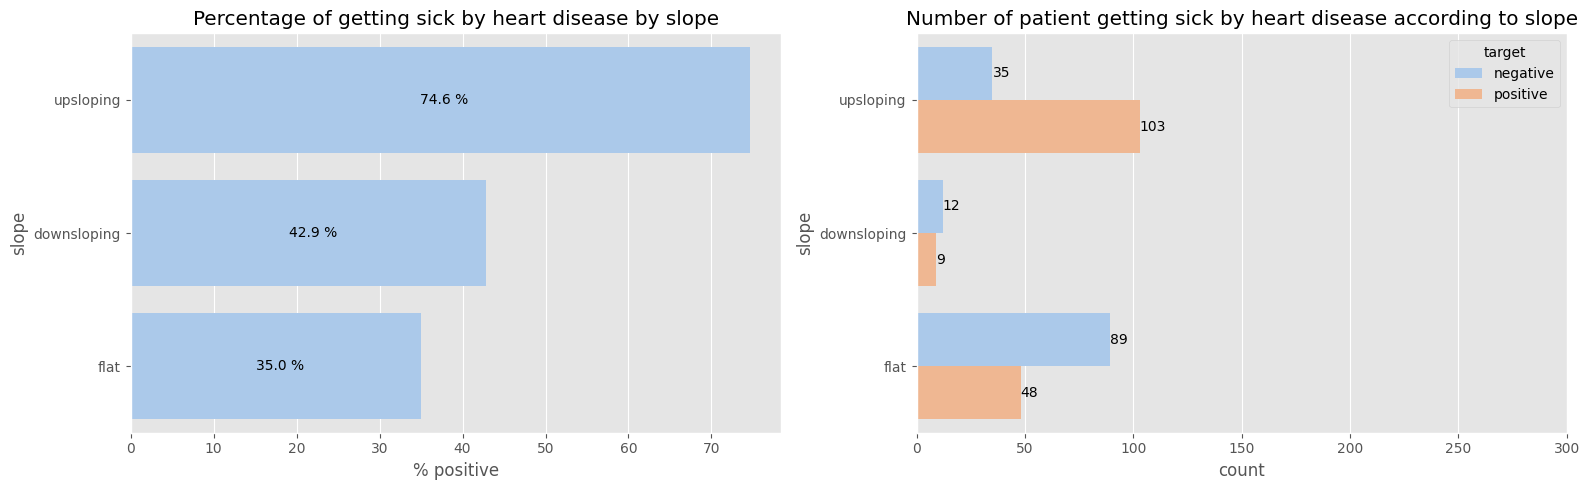

In [150]:
# Percentage and number of heart disease's patient by 'slope'
create_plot(data, 'slope', x_maks=300)

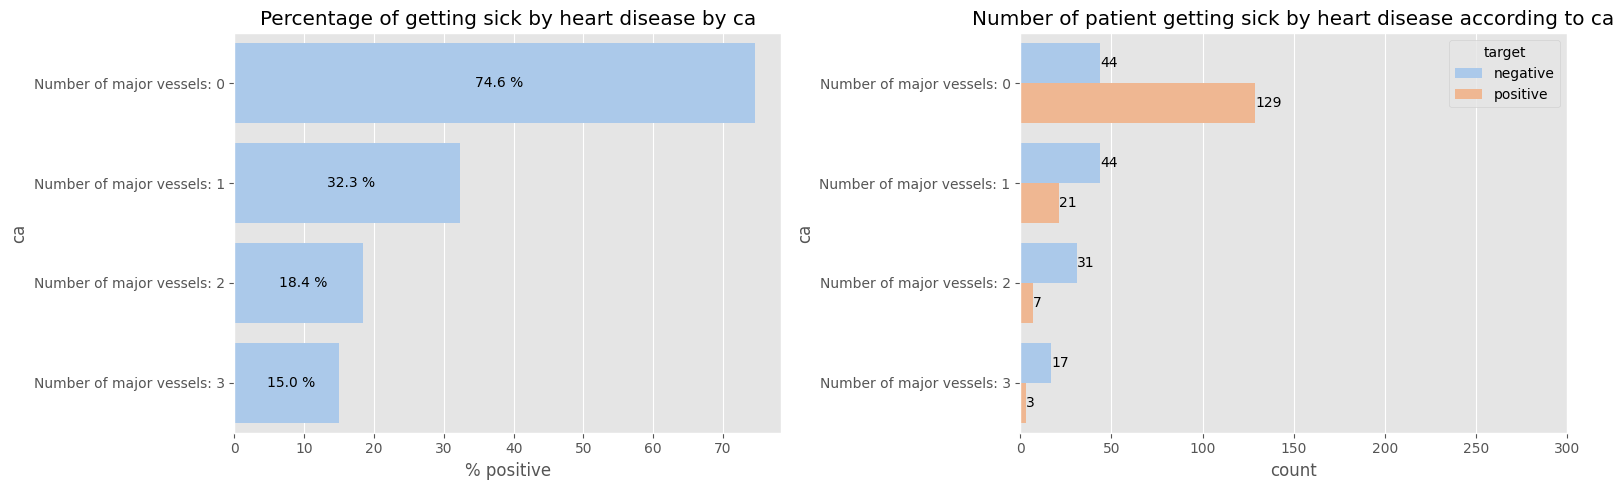

In [151]:
# Percentage and number of heart disease's patient by 'ca'
create_plot(data, 'ca', x_maks=300)

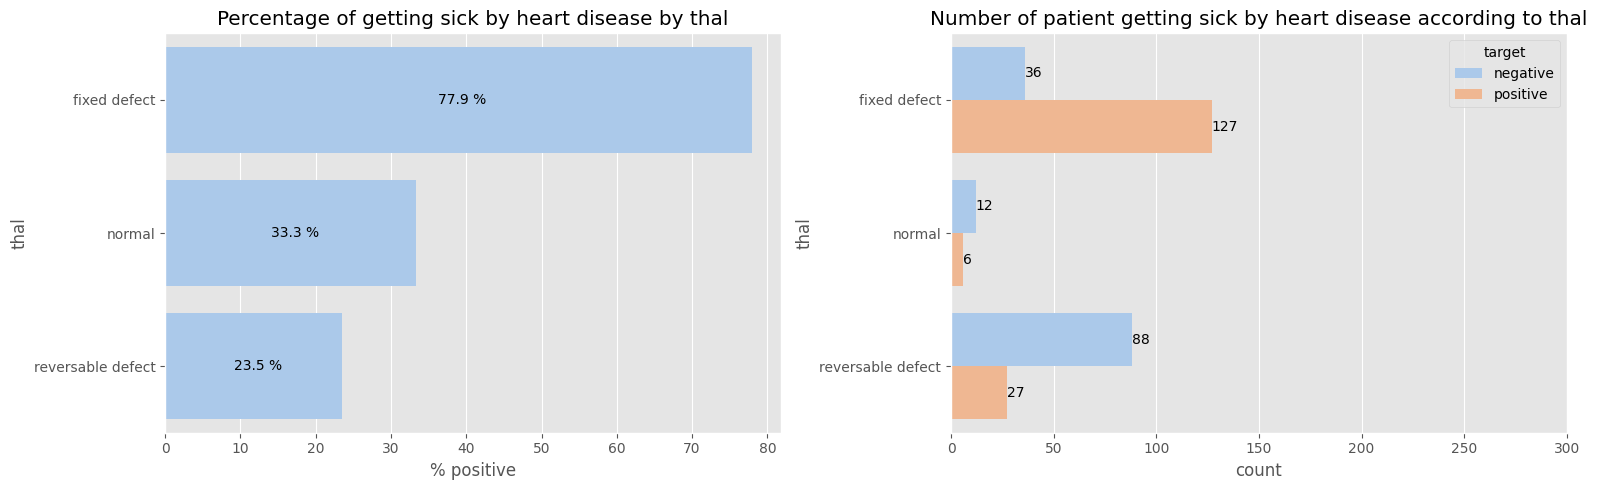

In [152]:
# Percentage and number of heart disease's patient by 'thal'
create_plot(data, 'thal', x_maks=300)

In [153]:
# Table of categorical feature vs target (claim)
for i in data.drop(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']).columns:
    categorical_claim_data = data.groupby(i)['target'].value_counts(normalize=True).unstack()
    display(categorical_claim_data.sort_values(by=['positive'], ascending=False))

target  negative  positive
sex                       
Female  0.252632  0.747368
Male    0.557214  0.442786

target            negative  positive
cp                                  
atypical angina   0.183673  0.816327
non-anginal pain  0.216867  0.783133
asymtomatic       0.304348  0.695652
typical angina    0.723404  0.276596

target  negative  positive
fbs                       
No      0.458498  0.541502
Yes     0.465116  0.534884

target                                          negative  positive
restecg                                                           
normal                                          0.374150  0.625850
probable/definite left ventricular hypertrophy  0.537931  0.462069
ST-T Wave abnormal                              0.750000  0.250000

target  negative  positive
exang                     
No      0.311558  0.688442
Yes     0.762887  0.237113

target       negative  positive
slope                          
upsloping    0.253623  0.746377
downsloping  0.571429  0.428571
flat         0.649635  0.350365

target                      negative  positive
ca                                            
Number of major vessels: 0  0.254335  0.745665
Number of major vessels: 1  0.676923  0.323077
Number of major vessels: 2  0.815789  0.184211
Number of major vessels: 3  0.850000  0.150000

target             negative  positive
thal                                 
fixed defect       0.220859  0.779141
normal             0.666667  0.333333
reversable defect  0.765217  0.234783

## **Modelling**

In [154]:
# Copy
heart_data = data.copy()

In [155]:
# Re-checking missing value from every columns
pd.DataFrame({'Missing values': [heart_data[col].isna().sum() for col in heart_data.columns]}, index=heart_data.columns.values)

Missing values
age                    0
sex                    0
cp                     0
trestbps               0
chol                   0
fbs                    0
restecg                0
thalach                0
exang                  0
oldpeak                0
slope                  0
ca                     0
thal                   0
target                 0

In [156]:
# Checking dimension of data
data.shape

(296, 14)

### **Replacing values**

Now we want to replace the content of 'target' column from 'positive' and 'negative' into 1 and 0. Because our main focus is the patient with positive heart disease, so the target should be as

Target :

**0** : Patients without heart disease or negative (`target` == 'negative')

**1** : Patient with positive heart diseases (`target` == 'positive')

In [157]:
# Replacing values
heart_data['target'] = np.where(heart_data['target']=='positive',1,0)
heart_data['target'].unique()

array([0, 1])

### **Define Features and target**

In [158]:
# Define features and target
# Features
X = heart_data.drop(columns='target')

# target
y = heart_data['target']

In [159]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

### **Data Splitting**

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

### **Feature Engineering**

**Outlier handling**

We use winsorizing method for handling outliers. This method works by limiting extreme values to reduce their impact. So, the method replaces extreme values with the nearest values that are not considered outliers, thereby reducing the influence of these extremes on statistical analyses.

In [161]:
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0]), 
                  upper=s.quantile(1-limits[1]))

In [162]:
# Outlier Handling
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from scipy.stats.mstats import winsorize
from typing import Literal


class handling_outliers(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self  
    
    def transform(self, X, y=None):
        heart_data = X.copy()
        cols_to_winsorize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
        heart_data[cols_to_winsorize] = heart_data[cols_to_winsorize].apply(winsorize_with_pandas, args=([0.01, 0.01],))
        return heart_data
    
    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

In [163]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']),
], remainder='passthrough')

In [164]:
# Scaling
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [165]:
# Resampling

# Defining SMOTE
smote = SMOTE(random_state=0)

# Defining SMOTENC
smotenc = SMOTENC(random_state=0, categorical_features=[1, 2, 5, 6, 8, 10, 11, 12]) # ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [166]:
# Pipeline
Pipeline([
    ('outlier', handling_outliers()),
    ('transformer', transformer),
    ('scaler', scaler),
    ('resamplers', smotenc)
])

Pipeline(steps=[('outlier', handling_outliers()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('scaler', MinMaxScaler()),
                ('resamplers',
                 SMOTENC(categorical_features=[1, 2, 5, 6, 8, 10, 11, 12],
                         random_state=0))])

In [167]:
# Cross validation
# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

In [168]:
## Machine Learning Algorithmic models
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grad = GradientBoostingClassifier(random_state=0)
cat = CatBoostClassifier(verbose=False,random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [169]:
# recall
# Comparing resampling between SMOTENC and SMOTE 

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

recall_mean_with_smote = []
recall_std_with_smote = []
recall_mean_with_smotenc = []
recall_std_with_smotenc = []

for model in  models :

    # modeling with resampling - smote
    pipe_model_with_smote = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smote),
        ('algo', model)
    ])

    model_cv_with_smote = cross_val_score(
        estimator = pipe_model_with_smote,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    recall_mean_with_smote.append(model_cv_with_smote.mean())
    recall_std_with_smote.append(model_cv_with_smote.std())

    # modeling with resampling - SMOTENC

    pipe_model_with_smotenc = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', smotenc),
        ('algo', model)
    ])

    model_cv_with_smotenc = cross_val_score(
        estimator = pipe_model_with_smotenc,
        X = X_train,
        y = y_train,
        cv = skf,
        scoring = 'recall',
        n_jobs = -1
    )
    recall_mean_with_smotenc.append(model_cv_with_smotenc.mean())
    recall_std_with_smotenc.append(model_cv_with_smotenc.std())

In [170]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'recall_mean_with_smotenc' : recall_mean_with_smotenc,
    'recall_mean_with_smote' : recall_mean_with_smote,
    'recall_std_with_smotenc' : recall_std_with_smotenc,
    'recall_std_with_smote' : recall_std_with_smote,
}).sort_values('recall_mean_with_smote', ascending=False)

model  recall_mean_with_smotenc  recall_mean_with_smote  \
3        Random Forest                  0.867385                0.875385   
6             CatBoost                  0.875385                0.874769   
1                  KNN                  0.851385                0.860000   
0  Logistic Regression                  0.851692                0.851385   
5         GradienBoost                  0.828308                0.843692   
8             LightGBM                  0.820308                0.836615   
7              XGBoost                  0.812308                0.828000   
4             AdaBoost                  0.813231                0.820615   
2        Decision Tree                  0.726769                0.751077   

   recall_std_with_smotenc  recall_std_with_smote  
3                 0.067035               0.074776  
6                 0.065662               0.045613  
1                 0.076172               0.076522  
0                 0.065940               0.056941  
5                 0.079081               0.077295  
8                 0.088020               0.074766  
7                 0.072285               0.039791  
4                 0.065413               0.066276  
2                 0.088681               0.139990

In [171]:
# Predicting to test data

mean_recall_test = []

# 10 Models selection
models = [logreg, knn, dtree, rf, ada, grad, cat, xgb, lgbm]

# Mencari model terbaik berdasarkan ROC AUC
for algoritma in models :
    model_pipe = Pipeline([
        ('outlier', handling_outliers()),
        ('prep', transformer),
        ('scaler', scaler), 
        ('resample', smotenc),
        ('algo', algoritma)
    ])

    # fitting
    model_pipe.fit(X_train, y_train)

    # predict
    y_pred = model_pipe.predict(X_test)

    # evaluate
    score = recall_score(y_test, y_pred)
    mean_recall_test.append(score)

[LightGBM] [Info] Number of positive: 128, number of negative: 128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 256, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [172]:
# Model performance comparison
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean recall train': recall_mean_with_smotenc, #smote
    'mean recall test': mean_recall_test
}).sort_values('mean recall test', ascending=False)

model  mean recall train  mean recall test
1                  KNN           0.851385           0.84375
0  Logistic Regression           0.851692           0.81250
3        Random Forest           0.867385           0.81250
8             LightGBM           0.820308           0.75000
4             AdaBoost           0.813231           0.71875
5         GradienBoost           0.828308           0.71875
6             CatBoost           0.875385           0.71875
7              XGBoost           0.812308           0.71875
2        Decision Tree           0.726769           0.68750

### **Hyperparameter tunning**

**Hyperparameter tuning KNN**

In [173]:
# Hyperparameter tuning KNN

# Benchmarck model 1
knn_clf = KNeighborsClassifier()

# cv
skfold = StratifiedKFold(n_splits = 5)

# Hyperparameter space of knn
hyperparam_space_knn_clf = [{
    'model__n_neighbors' : [3, 5, 7],
    'model__weights' : ['uniform', 'distance'],
    'model__metric' : ['euclidean', 'manhattan'],
}]

# Create the algorithm chains
estimator_knn_clf = Pipeline([
    ('outlier', handling_outliers()),
    ('prep', transformer),
    ('scaler', scaler),
    ('resampler', smotenc), 
    ('model', knn_clf)
    ])

tuned_knn_clf = RandomizedSearchCV(
    estimator_knn_clf, 
    n_jobs=-1, 
    param_distributions=hyperparam_space_knn_clf,
    scoring='recall',
    n_iter=200,
    cv=skfold, 
    random_state=0
    )
# fitting 
tuned_knn_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', handling_outliers()),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['sex',
                                                                                'cp',
                                                                                'fbs',
                                                                                'restecg',
                                                                                'exang',
                                                                                'slope',
                                                                                'ca',
                                                                                'thal'])])),
                                             ('scaler', MinMaxScaler()),
                                             ('resampler',
                                              SMOTENC(categorical_features=[1,
                                                                            2,
                                                                            5,
                                                                            6,
                                                                            8,
                                                                            10,
                                                                            11,
                                                                            12],
                                                      random_state=0)),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'model__metric': ['euclidean',
                                                           'manhattan'],
                                         'model__n_neighbors': [3, 5, 7],
                                         'model__weights': ['uniform',
                                                            'distance']}],
                   random_state=0, scoring='recall')

In [174]:
# Best score from randomized_search
print(f'Recall score pada train set: {tuned_knn_clf.best_score_:.3f}')

# hyperparameter pada score terbaik hasil dari from tuned knn
print(f'Best parameter: {tuned_knn_clf.best_params_}')

Recall score pada train set: 0.891
Best parameter: {'model__weights': 'uniform', 'model__n_neighbors': 3, 'model__metric': 'manhattan'}


In [175]:
# Model after hyperparameter tuning
tuned_model_knn_clf = tuned_knn_clf.best_estimator_

# Fitting model
tuned_model_knn_clf.fit(X_train, y_train)

# Predict to test set
y_tuned_knn_clf = tuned_model_knn_clf.predict(X_test)

# Evaluate recall score on test set
recall_score(y_test, y_tuned_knn_clf)

0.875

In [176]:
print("The Classification Report of K_Nearest Neighbors Classifier")
print(classification_report(y_test, y_tuned_knn_clf))

The Classification Report of K_Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.86        32

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



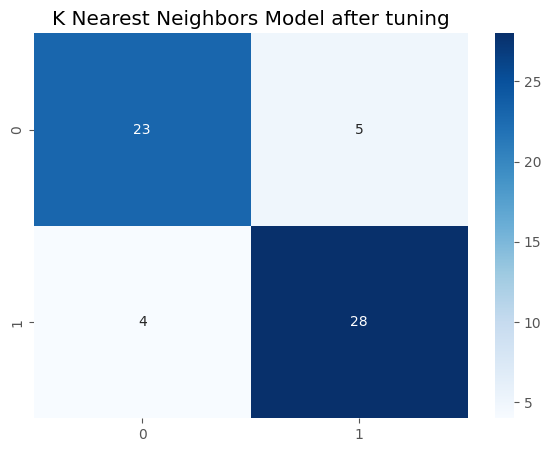

In [177]:
# Confusion matrix visualization of knn

# Setting size
plt.figure(figsize=(7,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_tuned_knn_clf), cmap='Blues', annot=True, fmt='.0f')
plt.title('K Nearest Neighbors Model after tuning')
plt.show()

**Analysis and Insight from KNN Classifier after hyperparameter tuning**

**Before Tuning:**
* Train Recall: 0.851
* Test Recall: 0.844
* Confusion Matrix: High true positive rate, low false negative rate, and a good balance between precision and recall.
  
**After Tuning:**
* Train Recall: 0.891
* Test Recall: 0.875
* Improved recall on both train and test sets, indicating better identification of true positives with tuning. This is consistent with the high recall and F1-score observed from the confusion matrix.

**Insight**

* KNN after tuning shows the best performance with a significant improvement in recall, maintaining a balance between true positive and false negative rates. It suggests that KNN is well-suited for this task and benefits from hyperparameter tuning.

**Hyperparameter tuning Random forest**

In [196]:
# Hyperparameter tuning random forest

# Benchmarck model 1
rf_clf = RandomForestClassifier(random_state=0)

# cv
skfold = StratifiedKFold(n_splits = 5)

# Hyperparameter space random forest

hyperparam_space_rf_clf = [{
    'model__n_estimators' : range(10,101,10),
    'model__max_features' : ['sqrt','log2',None],   #None = auto in new scikit learn
    'model__max_depth' : range(10,101,10),
    'model__min_samples_split': range(2, 21, 2),
    'model__min_samples_leaf': range(1, 21, 2)
}]

# Create the algorithm chains
estimator_rf_clf = Pipeline([
    ('outlier', handling_outliers()),
    ('prep', transformer),
    ('scaler', scaler),
    ('resampler', smotenc), 
    ('model', rf_clf)
    ])

tuned_rf_clf = RandomizedSearchCV(
    estimator_rf_clf, 
    n_jobs=-1, 
    param_distributions=hyperparam_space_rf_clf,
    scoring='recall',
    n_iter=200,
    cv=skfold, 
    random_state=0
    )
# fitting 
tuned_rf_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', handling_outliers()),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['sex',
                                                                                'cp',
                                                                                'fbs',
                                                                                'restecg',
                                                                                'exang',
                                                                                'slope',
                                                                                'ca',
                                                                                'thal'])])),
                                             ('scaler', MinMaxScaler()),
                                             ('resampler',
                                              SMOTENC(...
                                                                            11,
                                                                            12],
                                                      random_state=0)),
                                             ('model',
                                              RandomForestClassifier(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'model__max_depth': range(10, 101, 10),
                                         'model__max_features': ['sqrt', 'log2',
                                                                 None],
                                         'model__min_samples_leaf': range(1, 21, 2),
                                         'model__min_samples_split': range(2, 21, 2),
                                         'model__n_estimators': range(10, 101, 10)}],
                   random_state=0, scoring='recall')

In [197]:
# Recall score randomized_search
print(f'Recall score on train set: {tuned_rf_clf.best_score_:.3f}')

# Best parameter
print(f'Best parameter: {tuned_rf_clf.best_params_}')

Recall score on train set: 0.891
Best parameter: {'model__n_estimators': 50, 'model__min_samples_split': 8, 'model__min_samples_leaf': 3, 'model__max_features': 'sqrt', 'model__max_depth': 50}


In [198]:
# Model after hyperparameter tuning
tuned_model_rf_clf = tuned_rf_clf.best_estimator_

# Fitting model
tuned_model_rf_clf.fit(X_train, y_train)

# Predict to test set
y_tuned_rf_clf = tuned_model_rf_clf.predict(X_test)

# Evaluate recall score on test set
recall_score(y_test, y_tuned_rf_clf)

0.8125

In [199]:
# random forest classification report
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_tuned_rf_clf))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.81      0.81      0.81        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



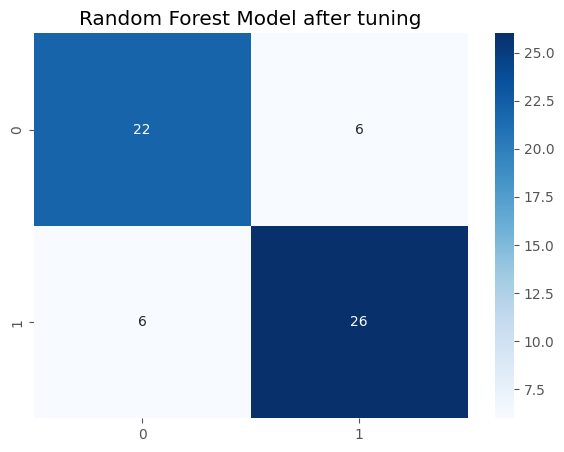

In [200]:
# Confusion matrix visualization of random forest

# Setting size
plt.figure(figsize=(7,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_tuned_rf_clf), cmap='Blues', annot=True, fmt='.0f')
plt.title('Random Forest Model after tuning')
plt.show()

**Analysis and Insights from Random Forest Classifier after hyperparameter tuning**

**Before Tuning:**
* Train Recall: 0.867
* Test Recall: 0.813
* Confusion Matrix: Slightly lower true positive rate compared to KNN, with a balance between precision and recall.

**After Tuning:**
* Train Recall: 0.891
* Test Recall: 0.813
* No improvement in test recall after tuning, indicating potential overfitting or lack of generalization despite high train recall.

**Insight:**
* While Random Forest has a high train recall after tuning, its test recall did not improve, suggesting overfitting. It performs reasonably well but isn't as reliable as KNN in terms of recall stability across train and test sets.

**Hyperparameter tuning logistic regression**

In [191]:
# Hyperparameter tuning logistic regression

# Benchmarck model 3
logreg_clf = LogisticRegression(random_state=0)

# cv
skfold = StratifiedKFold(n_splits = 5)

# Hyperparameter space logistic regression

hyperparam_space_logreg_clf = [{
    'model__max_iter' : [30, 50, 100, 150],   
    'model__multi_class' : ['auto'],
    'model__solver': ['lbfgs', 'newton-cholesky']
}]

# Create the algorithm chains
estimator_logreg_clf = Pipeline([
    ('outlier', handling_outliers()),
    ('prep', transformer),
    ('scaler', scaler),
    ('resampler', smotenc), 
    ('model', logreg_clf)
    ])

tuned_logreg_clf = RandomizedSearchCV(
    estimator_logreg_clf, 
    n_jobs=-1, 
    param_distributions=hyperparam_space_logreg_clf,
    scoring='recall',
    n_iter=200,
    cv=skfold, 
    random_state=0
    )
# fitting 
tuned_logreg_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('outlier', handling_outliers()),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['sex',
                                                                                'cp',
                                                                                'fbs',
                                                                                'restecg',
                                                                                'exang',
                                                                                'slope',
                                                                                'ca',
                                                                                'thal'])])),
                                             ('scaler', MinMaxScaler()),
                                             ('resampler',
                                              SMOTENC(categorical_features=[1,
                                                                            2,
                                                                            5,
                                                                            6,
                                                                            8,
                                                                            10,
                                                                            11,
                                                                            12],
                                                      random_state=0)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'model__max_iter': [30, 50, 100, 150],
                                         'model__multi_class': ['auto'],
                                         'model__solver': ['lbfgs',
                                                           'newton-cholesky']}],
                   random_state=0, scoring='recall')

In [192]:
# Recall score randomized_search
print(f'Recall score on train set: {tuned_logreg_clf.best_score_:.3f}')

# Best parameter
print(f'Best parameter: {tuned_logreg_clf.best_params_}')

Recall score on train set: 0.852
Best parameter: {'model__solver': 'lbfgs', 'model__multi_class': 'auto', 'model__max_iter': 30}


In [193]:
# Model after hyperparameter tuning
tuned_model_logreg_clf = tuned_logreg_clf.best_estimator_

# Fitting model
tuned_model_logreg_clf.fit(X_train, y_train)

# Predict to test set
y_tuned_logreg_clf = tuned_model_logreg_clf.predict(X_test)

# Evaluate recall score on test set
recall_score(y_test, y_tuned_logreg_clf)

0.8125

In [194]:
# Logistic regression classification report
print("The Classification Report of Logistic Regression Classifier")
print(classification_report(y_test, y_tuned_logreg_clf))

The Classification Report of Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        28
           1       0.87      0.81      0.84        32

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60



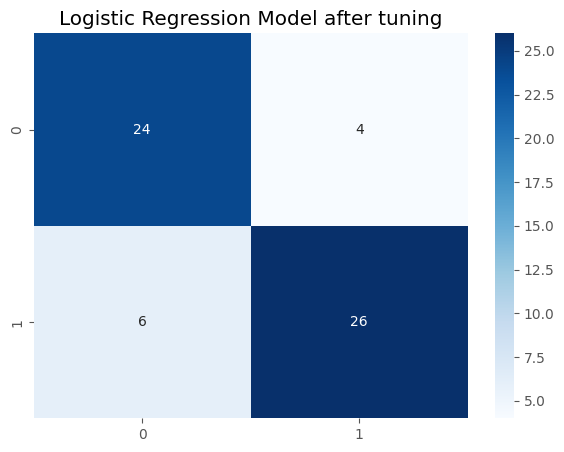

In [195]:
# Confusion matrix visualization of logistic regression

# Setting size
plt.figure(figsize=(7,5)) 

# Confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_tuned_logreg_clf), cmap='Blues', annot=True, fmt='.0f')
plt.title('Logistic Regression Model after tuning')
plt.show()

**Analysis and Insights from Logistic Regression Classifier**

**Before Tuning:**
* Train Recall: 0.851
* Test Recall: 0.813
* Confusion Matrix: High precision with a balance between true positives and false positives.

**After Tuning:**
* Train Recall: 0.851
* Test Recall: 0.813
* No change in recall after tuning, indicating stability but also lack of improvement with tuning.

**Insight:** 
* Logistic Regression shows consistent but moderate recall, with the highest precision among the models. It's stable but doesn't benefit from tuning as much as KNN. It is suitable if precision is prioritized over recall.

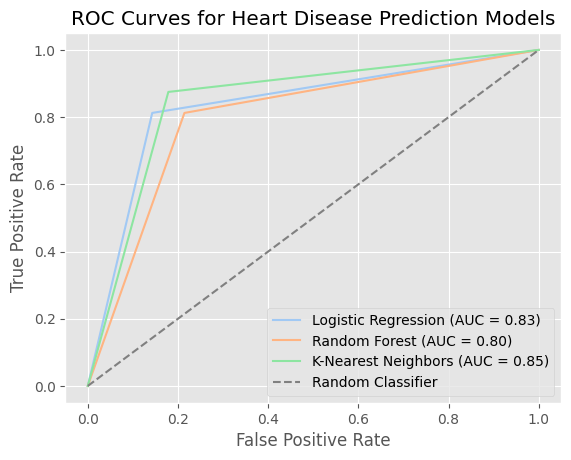

In [201]:
# ROC graph analysis

def plot_roc_curves(y_test, y_tuned_knn_clf, y_tuned_rf_clf, y_tuned_logreg_clf):

    # calculate ROC curves for each model
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_tuned_knn_clf)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_tuned_rf_clf)
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_tuned_logreg_clf)

    # Calculate the AUC-ROC scores
    auc_knn = roc_auc_score(y_test, y_tuned_knn_clf)
    auc_rf = roc_auc_score(y_test, y_tuned_rf_clf)
    auc_logreg = roc_auc_score(y_test, y_tuned_logreg_clf)
    
    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
    
    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_tuned_knn_clf, y_tuned_rf_clf, y_tuned_logreg_clf)

### **Best model selection**

**Overal Recall score comparison**

| Model | Conditions | Train score  | Test score |
| --- | --- | --- | ---|
| KNN Classifier | Before Tuning |  0.851 | 0.844 |
| KNN Classifier |  After Tuning | 0.891 | 0.875 | 
| Random Forest Classifier | Before Tuning |  0.867 | 0.813 |
| Random Forest Classifier |  After Tuning | 0.891 | 0.813 | 
| Logistic Regression Classifier | Before Tuning |  0.851 | 0.813 |
| Logistic Regression Classifier |  After Tuning | 0.851 | 0.813 | 

Insights and Best Model Selection
* KNN: Has the highest recall (0.875) and F1-score (0.86), indicating that it is best at identifying true positives (patients with heart disease). KNN Stands out as the best model overall due to its highest recall and F1-score, indicating it effectively identifies true positives while maintaining a good balance with precision. The improvement after tuning demonstrates its adaptability and robustness.
* Logistic Regression: Has the highest precision (0.867), suggesting it is best at minimizing false positives (predicting heart disease when there is none). Its recall is consistent but lower than KNN, and it doesn't benefit from tuning.
* Random Forest: While it has high recall on the training set after tuning, the lack of improvement on the test set suggests overfitting. It is a strong performer but less reliable for generalization. Random forest performs reasonably well but is outperformed by KNN and Logistic Regression in all metrics.

Given that heart disease prediction typically benefits more from minimizing false negatives (as missing a diagnosis can have more severe consequences), KNN Classifier (After Tuning) is the best model for predicting heart disease in this scenario, as it provides the best recall and F1-score, crucial for minimizing missed diagnoses. 

### **Learning curve**

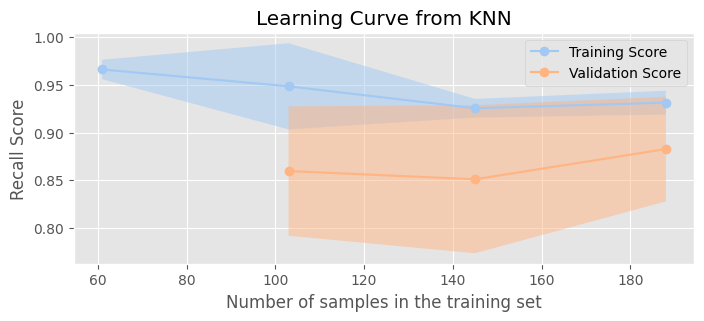

In [179]:
# Generate learning curve Random forest
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "scoring": 'recall'
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(tuned_model_knn_clf, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'])
ax.set_title(f'Learning Curve from KNN')
ax.set_ylabel('Recall Score')

# Show the plot
plt.show()

### **LIME**

In [180]:
# Lime preparation

import lime
from lime import lime_tabular

# Column Transformer
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']),
], remainder='passthrough')

# Transform the training data
X_train_encoded = ct.fit_transform(X_train)
column_names = ct.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_encoded, columns=column_names)

# Initialize and fit the knn model
knn_best = KNeighborsClassifier(weights='uniform', n_neighbors=3, metric='manhattan')
knn_best.fit(X_train_df, y_train)

# Transform in Xtest
X_test_ct = ct.transform(X_test)
column_name = ct.get_feature_names_out()

X_test_df = pd.DataFrame(X_test_ct,columns=column_name)

In [181]:
def explainer_lime(index):
    explainer = lime_tabular.LimeTabularExplainer(
        training_data = X_train_df.to_numpy(),
        feature_names = X_train_df.columns.to_list(),
        class_names=['negative','positive'],
        mode = 'classification'
    )

    exp = explainer.explain_instance(
        X_test_df.iloc[index].values,
        knn_best.predict_proba,
        num_features = 10
    )
    
    print(f"The prediction must predict that this patient is: {('positive' if y_test.iloc[index] == 1 else 'negative')} heart disease from y_test")
    print(' ')
    
    exp.as_pyplot_figure()
    exp.show_in_notebook(show_table=True)

**LIME explanation for positive case**

In [182]:
X_test.iloc[[10]]

age   sex               cp  trestbps  chol fbs restecg  thalach exang  \
102   54  Male  atypical angina       108   309  No  normal      156    No   

     oldpeak      slope                          ca               thal  
102      0.0  upsloping  Number of major vessels: 0  reversable defect

In [183]:
y_test.iloc[[10]]

102    1
Name: target, dtype: int32

The prediction must predict that this patient is: positive heart disease from y_test
 


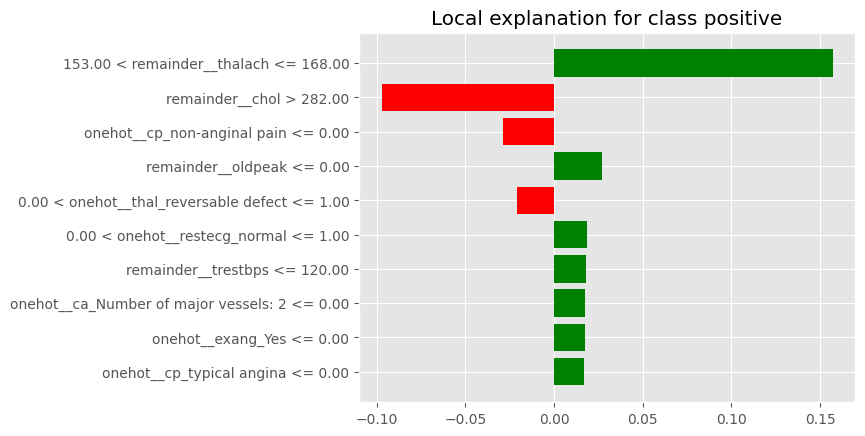

In [184]:
explainer_lime(10)

LIME insights for positive patient(10) according to this tuned KNN model::
* The maximum heart rate during exercise testing or 'thalach' of the patient(10) which is 156 bpm probably contribute to the symptom of positive heart disease.
* In contrast, the cholestrol or 'chol' of the patient may contribute to the symptom of negative. 

**LIME explanation for negative case**

In [185]:
X_test.iloc[[11]]

age   sex              cp  trestbps  chol fbs restecg  thalach exang  \
694   39  Male  typical angina       118   219  No  normal      140    No   

     oldpeak slope                          ca               thal  
694      1.2  flat  Number of major vessels: 0  reversable defect

In [186]:
y_test.iloc[[11]]

694    0
Name: target, dtype: int32

The prediction must predict that this patient is: negative heart disease from y_test
 


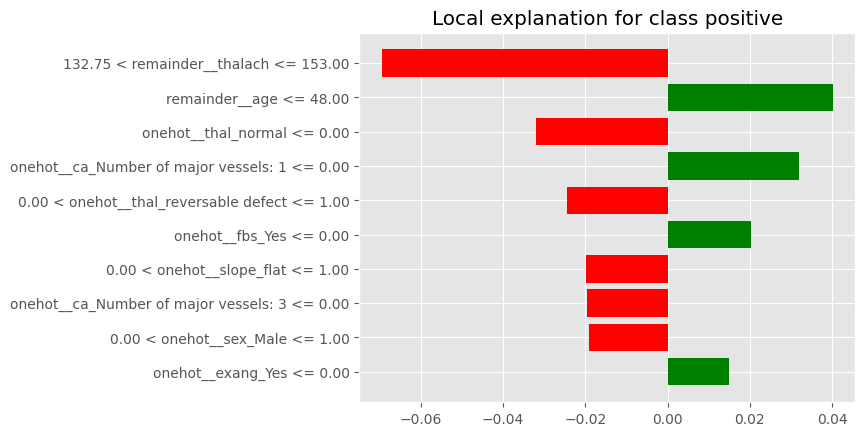

In [187]:
explainer_lime(11)

LIME insights for negative patient(11) according to this tuned KNN model:
* The maximum heart rate during exercise testing or 'thalach' of the patient(11) which is 140 bpm probably contribute to the negative heart disease.
* In contrast, the age of the patient may contribute to the symptom of positive. 

### **Conclusion**

Tuned KNN is the best model for predicting heart disease in this scenario, due to its high recall of 0.891, F1-score 0.86 and best ROC AUC score of 0.85.

In [ ]:
## **Saving final model**

# Saving Model

import pickle

# Fitting model to all data
tuned_model_knn_clf.fit(X, y)

# Save Model
pickle.dump(tuned_model_knn_clf, open('knn_for_heart_disease_prediction.sav', 'wb'))



In [190]:
import pickle

# Assuming 'model' is your trained model
with open('knn_for_heart_disease_prediction.pkl', 'wb') as f:
    pickle.dump(model, f)

In [189]:
## Saving best model in joblib

# Saving final model

import joblib

# Fitting model to all data
tuned_model_knn_clf.fit(X, y)

# Save Model
joblib.dump(tuned_model_knn_clf, 'knn_for_heart_disease_prediction.joblib')


['knn_for_heart_disease_prediction.joblib']